<h2> Group 20 - DMML Coursework 2</h2>
<h1>RandomForest</h1>
    
<hr>

<h2 style="color:orange"> Datasets  </h2> 

Load the required datasets from the CSV files.

First, we must import the required libraries:

In [1]:
#Specify Imports

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

from sklearn.ensemble import RandomForestClassifier

Then, load the datasets:

<h3> Training Data </h3>

In [2]:
#read in data from csv 
training_Data = pd.read_csv("For_10_Fold_Cross_Validation.csv")

#look at shape
training_Data.shape 

#look at data format
training_Data.head()

0      1      2      3      4      5      6      7      8      9  ...  \
0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  ...   
1   26.0   27.0   28.0   27.0   27.0   24.0   13.0   12.0   21.0   84.0  ...   
2  149.0  110.0   68.0   55.0   54.0   55.0   45.0   36.0   31.0   35.0  ...   
3   73.0   80.0   86.0   97.0  113.0  120.0  118.0   84.0   56.0   46.0  ...   
4   62.0   58.0   57.0   57.0   57.0   58.0   58.0   54.0   52.0   50.0  ...   

    2295  2296   2297   2298  2299  2300   2301   2302   2303  Class  
0   31.0  28.0   25.0   22.0  22.0  25.0   26.0   25.0   25.0   four  
1   24.0  52.0   77.0   94.0  96.0  96.0   93.0   91.0   89.0  eight  
2  149.0  96.0   52.0   54.0  68.0  87.0  110.0  104.0   92.0    two  
3   98.0  99.0  100.0  101.0  99.0  98.0  100.0  106.0  114.0    one  
4   30.0  29.0   28.0   26.0  25.0  27.0   28.0   28.0   31.0  three  

[5 rows x 2305 columns]

In [3]:
#define the data to be used as all but the class attribute from the data 
X_Train = training_Data.drop('Class', axis = 1)

#define the expexted value to be the class column of the input data 
y_train = training_Data['Class']

<h4> Data Preprocessing </h4>

Preprocess the data using scaling. Datasets have already been discretised and randomised.

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_Train)

<h3> Test Data </h3>

In [5]:
testData = pd.read_csv ('Test_Dataset.csv')

X_Test = testData.drop('Class', axis = 1)
y_test = testData['Class']


X_test = sc.fit_transform(X_Test)

<h3> 4000 Split </h3>

In [6]:
#Read in data
testData_with4000 = pd.read_csv ('testData_4000Split.csv')
data_split5690 = pd.read_csv ('trainData_5690Split.csv')

In [7]:
#setup training data
X_Train_4000Split = data_split5690.drop('Class', axis = 1)
y_train_4000Split = data_split5690['Class']


#setup test data
X_Test_4000Split = testData_with4000.drop('Class', axis = 1)
y_test_4000Split = testData_with4000['Class']



sc = StandardScaler()
X_train_4000Split = sc.fit_transform(X_Train_4000Split)
X_test_4000Split = sc.fit_transform(X_Test_4000Split)

<h3>9000 Split</h3>

In [8]:
#Read in data
testData_with9000 = pd.read_csv ('testData_9000Split.csv')
data_split690 = pd.read_csv ('trainData_690Split.csv')

In [9]:
#setup training data
X_Train_9000Split = data_split690.drop('Class', axis = 1)
y_train_9000Split = data_split690['Class']


#setup test data
X_Test_9000Split = testData_with9000.drop('Class', axis = 1)
y_test_9000Split = testData_with9000['Class']

#scale data
X_train_9000Split = sc.fit_transform(X_Train_9000Split)
X_test_9000Split = sc.fit_transform(X_Test_9000Split)

In [10]:
from sklearn.model_selection import train_test_split

X_splitTrain, X_splitTest, y_splitTrain, y_splitTest = train_test_split(X_Train, y_train, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9690, 2304) (3090, 2304) (9690,) (3090,)


<h3> Exploratory </h3>

<i> This is the exploratory data set that was produced as a result of experiments in coursework 1.</i>

In [11]:
#Read in data
testData_Explore = pd.read_csv ('Test_Exploratory_random.csv')
data_Explore = pd.read_csv ('Top_20_Exploratory_random.csv')

In [12]:
#setup training data
X_Train_Explore = data_Explore.drop('Class', axis = 1)
y_train_Explore = data_Explore['Class']


#setup test data
X_Test_Explore = testData_Explore.drop('Class', axis = 1)
y_test_Explore = testData_Explore['Class']


sc = StandardScaler()
X_train_Explore = sc.fit_transform(X_Train_Explore)
X_test_Explore = sc.fit_transform(X_Test_Explore)

Summary : 

X_train - full training data (minus class data) <br>
X_train_4000Split - 4000 removed instances from X_train<br>
X_train_9000Split - 9000 removed instances from X_train <br>

X_test - original test data 
X_test_4000Split - 4000 more instances, taken from X_train<br>
X_test_9000Split - 9000 more instances, taken from X_train<br>

y_train - class attributes for the full training data<br>
y_train_4000Split - 4000 removed instances than y_train<br>
y_train_9000Split - 9000 removed instances than y_train<br>

y_test - class attributes for original testing data <br>
y_test_4000Split - 4000 more instances, taken from y_train <br>
y_test_9000Split - 9000 more instances, taken from y_train <br>


<h1> Random Forests</h1>
    
<h2 style="color:orange">Default Settings</h2>
<hr>

<i>Decision tree adapted from : 
https://scikit-learn.org/stable/modules/generated/sklearn.tree.RandomForestClassifier.html </i>

<i>Cross-Validation adapted from : 
https://scikit-learn.org/stable/modules/cross_validation.html </i>

<h3> Cross validation </h3>

<i> Goal: run cross a decision tree classifier with 10 fold cross validation then output metrics</i>

In [194]:
# adapted from https://scikit-learn.org/stable/modules/generated/sklearn.tree.RandomForestClassifier.html
#
# Sklearn uses CART rather than C4.5 which is the algorithm that RF runs off so this could be incorrect. Both 

RF_crossVal = RandomForestClassifier()
RF_crossVal.fit(X_train, y_train)

#setup cross validation using the above classifier, X_train = data to be classified, y = the labels, CV = number of folds
cross_validation_scores_RF = cross_val_score(RF_crossVal, X_train, y_train, cv=10)

Text(0.5, 1.0, 'Average score: 0.9778121775025799')

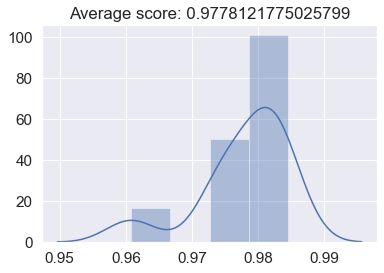

In [195]:
# use seaborn (sns) to plot a graph of the above scores
sns.distplot(cross_validation_scores_RF)
plt.title('Average score: {}'.format(np.mean(cross_validation_scores_RF)))

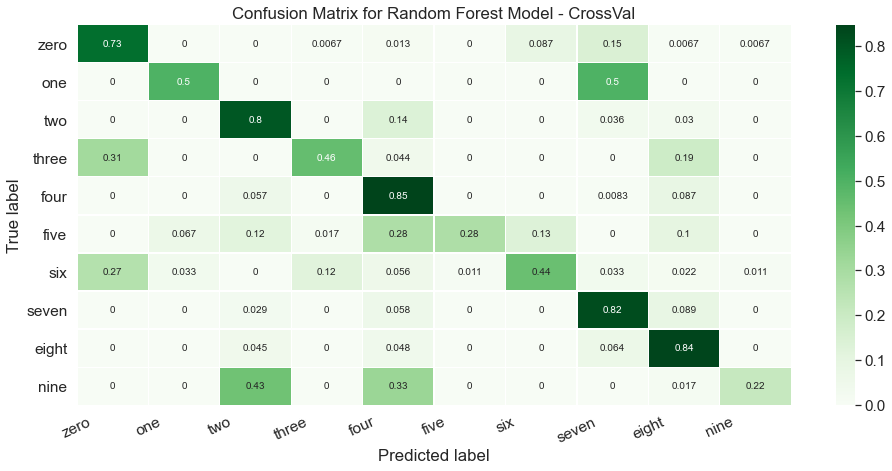

<Figure size 432x288 with 0 Axes>

In [196]:
#train model with 10 fold validation, 
#cross_val_predict Get predictions from each split of cross-validation for diagnostic purposes.
y_pred_RF_crossVal = cross_val_predict(RF_crossVal, X_train, y_train, cv=10)

#confusion matrix generation
conf_matrix_RF_crossVal = confusion_matrix(y_train, y_pred_RF_crossVal)
conf_matrix_RF_crossVal2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#accuracy report
classification_report_RF_crossVal = classification_report(y_train, y_pred_RF_crossVal)

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix_RF_crossVal2, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['zero','one', 'two', 'three', 
               'four', 'five', 'six',    
               'seven','eight','nine']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model - CrossVal')
plt.show()
plt.close()


#Find the accuracy of this model based on the test data
#accuracy_RF_crossVal = accuracy_score(y_train, y_pred_RF_crossVal)*100

#RF_crossVal_data = [n_nodes_RF_crossVal, depth_RF_crossVal, num_Leaves_RF_crossVal, accuracy_RF_crossVal]


In [197]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_crossVal)

print("\n")
print(classification_report_RF_crossVal)
#print(roc_auc_score(y, y_pred))
print("\n")


Confusion Matrix
[[ 529    0    0    1    4    0    3    2    1    0]
 [   2  202    0    2    0    0    0    0    4    0]
 [   0    0 1962    0   11    0    0    0    7    0]
 [   2    0    1  259    3    0    0    3    2    0]
 [   0    0   10    0 2182    0    0    6   22    0]
 [   1    0    1    0    1  236    1    0    0    0]
 [   4    0    3    0    8    0  342    2    1    0]
 [   0    1    3    0   13    0    0 1375   18    0]
 [   0    0   11    0   30    0    0   15 2194    0]
 [   0    0    2    0   22    0    0    1    1  184]]


              precision    recall  f1-score   support

       eight       0.98      0.98      0.98       540
        five       1.00      0.96      0.98       210
        four       0.98      0.99      0.99      1980
        nine       0.99      0.96      0.97       270
         one       0.96      0.98      0.97      2220
       seven       1.00      0.98      0.99       240
         six       0.99      0.95      0.97       360
       three     

<h3> Train Test Split </h3>

In [14]:
#define the model to be used 
RF_trainTestSplit = RandomForestClassifier()

#fit this model using the test data
RF_trainTestSplit.fit(X_splitTrain, y_splitTrain)

#test the model on the seperated data
y_pred_RF_trainTestSplit = RF_trainTestSplit.predict(X_splitTest)


#confusion matrix generation
conf_matrix_RF_trainTestSplit = confusion_matrix(y_splitTest, y_pred_RF_trainTestSplit)

#accuracy report
classification_report_RF_trainTestSplit = classification_report(y_splitTest, y_pred_RF_trainTestSplit)


#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_trainTestSplit)
print("\n")
print(classification_report_RF_trainTestSplit)

Confusion Matrix
[[181   0   0   1   3   0   2   1   1   0]
 [  0  49   0   2   0   1   0   1   5   0]
 [  0   0 614   0   7   0   0   1   5   0]
 [  0   0   0  87   5   1   1   2   0   0]
 [  0   0  12   0 727   0   0   2  13   0]
 [  0   0   0   0   0  65   0   0   0   0]
 [  1   0   1   0   2   0 105   2   0   0]
 [  0   0   1   0   6   0   0 455   9   0]
 [  0   0   7   0  13   0   0   7 724   0]
 [  0   0   4   0  13   0   0   0   0  59]]


              precision    recall  f1-score   support

       eight       0.99      0.96      0.98       189
        five       1.00      0.84      0.92        58
        four       0.96      0.98      0.97       627
        nine       0.97      0.91      0.94        96
         one       0.94      0.96      0.95       754
       seven       0.97      1.00      0.98        65
         six       0.97      0.95      0.96       111
       three       0.97      0.97      0.97       471
         two       0.96      0.96      0.96       751
        z

<hr>
<h3> Test Data </h3>

<i>Goal: Run decision classifier on test data provided.</i>

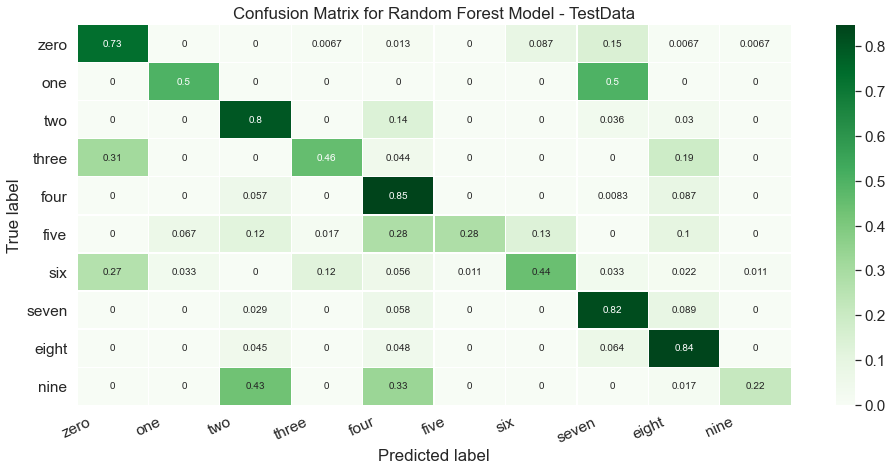

In [221]:
#define the model to be used 
RF_withTestData = RandomForestClassifier()

#fit this model using the test data
RF_withTestData.fit(X_train, y_train)

#test this model on the seperated data
y_pred_RF_withTestData = RF_withTestData.predict(X_test)


#confusion matrix generation
conf_matrix_RF_withTestData = confusion_matrix(y_test, y_pred_RF_withTestData)
conf_matrix_RF_withTestData2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#accuracy report
classification_report_RF_withTestData = classification_report(y_test, y_pred_RF_withTestData)

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix_RF_withTestData2, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['zero','one', 'two', 'three', 
               'four', 'five', 'six',    
               'seven','eight','nine']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model - TestData')
plt.show()
plt.close()

#Find the accuracy of this model based on the test data

#no need for this yet, as cannot generate nodes, leaves or accuracy independantly. But here incase we find a way
#RF_withTestData_data = [n_nodes_RF_withTestData, depth_RF_withTestData, num_Leaves_RF_withTestData, accuracy_RF_withTestData]

In [222]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_withTestData)
print("\n")
print(classification_report_RF_withTestData)

Confusion Matrix
[[103   0   0   6   6   0  11  17   6   1]
 [  0  29   1   0   0   0   0  30   0   0]
 [  1   0 508   0  88   0   0  40  23   0]
 [ 43   0   0  40   3   0   0   0   4   0]
 [  0   0  37   0 614   0   0  10  59   0]
 [  0   2  17   0   9  18   9   0   5   0]
 [ 29   0   0  11   3   1  41   2   2   1]
 [  0   0  15   0  29   0   1 360  45   0]
 [  0   0  40   0  36   0   0  39 635   0]
 [  0   0  26   0  25   0   0   0   1   8]]


              precision    recall  f1-score   support

       eight       0.59      0.69      0.63       150
        five       0.94      0.48      0.64        60
        four       0.79      0.77      0.78       660
        nine       0.70      0.44      0.54        90
         one       0.76      0.85      0.80       720
       seven       0.95      0.30      0.46        60
         six       0.66      0.46      0.54        90
       three       0.72      0.80      0.76       450
         two       0.81      0.85      0.83       750
        z

<hr>
<h3> 4000 into the test cases </h3>

<i> Goal: Run decision tree classifier on a reduced testing set, but increased training set.</i>

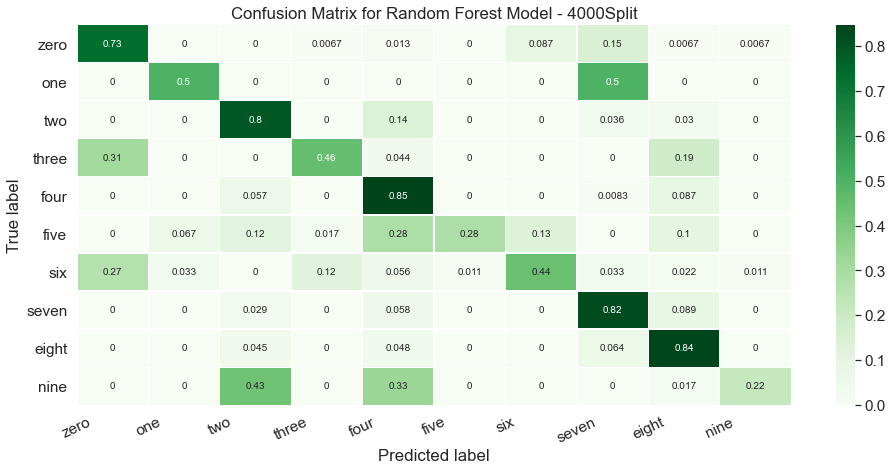

<Figure size 432x288 with 0 Axes>

In [200]:
#define the model to be used 
RF_4000Split = RandomForestClassifier()

#fit this model using the test data
RF_4000Split.fit(X_train_4000Split, y_train_4000Split)

#test this model on the seperated data
y_pred_RF_4000Split = RF_4000Split.predict(X_test_4000Split)

#generate confusion matrix
conf_matrix_RF_4000Split = confusion_matrix(y_test_4000Split, y_pred_RF_4000Split)
conf_matrix_RF_4000Split2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#generate classification report
classification_report_RF_4000Split = classification_report(y_test_4000Split, y_pred_RF_4000Split)

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix_RF_4000Split2, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['zero','one', 'two', 'three', 
               'four', 'five', 'six',    
               'seven','eight','nine']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model - 4000Split')
plt.show()
plt.close()

#Tree topology metrics
#n_nodes_RF_4000Split = RF_4000Split.tree_.node_count
#depth_RF_4000Split = RF_4000Split.get_depth()
#num_Leaves_RF_4000Split = RF_4000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_4000Split = accuracy_score(y_test_4000Split, y_pred_RF_4000Split)*100

#RF_4000Split_data = [n_nodes_RF_4000Split, depth_RF_4000Split, num_Leaves_RF_4000Split, accuracy_RF_4000Split]

In [201]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_4000Split)
print("\n")
print(classification_report_RF_4000Split)

Confusion Matrix
[[ 312    0    2    6    7    0   17   14    5    0]
 [   4   92    9    1    1    0    0   30    2    0]
 [   1    0 1293    0  100    0    0   26   26    0]
 [  42    0    0  152    6    0    3    2    7    0]
 [   0    0   49    0 1503    0    0   11   85    0]
 [   2    3    5    2   11  115   11    0   16    0]
 [  32    0    1    9   11    0  181    2    5    0]
 [   0    0   14    0   36    0    0  954   61    0]
 [   0    0   48    0   54    0    0   55 1506    0]
 [   0    0   18    0   51    0    0    0    4   75]]


              precision    recall  f1-score   support

       eight       0.79      0.86      0.83       363
        five       0.97      0.66      0.79       139
        four       0.90      0.89      0.90      1446
        nine       0.89      0.72      0.80       212
         one       0.84      0.91      0.88      1648
       seven       1.00      0.70      0.82       165
         six       0.85      0.75      0.80       241
       three     

<hr>
<h3> 9000 into the test cases </h3>

<i> Goal: Run decision tree classifier on a reduced training set, but increased testing set.</i>

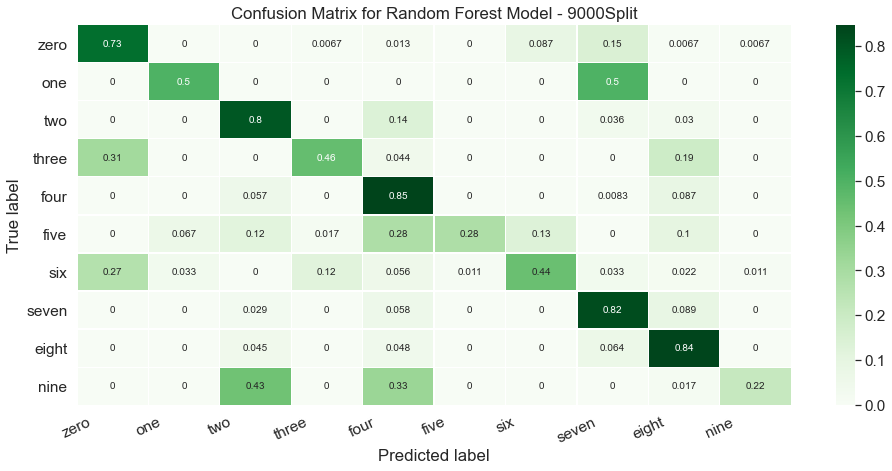

<Figure size 432x288 with 0 Axes>

In [202]:
#define the model to be used 
RF_9000Split = RandomForestClassifier()

#fit this model using the test data
RF_9000Split.fit(X_train_9000Split, y_train_9000Split)

#test this model on the seperated data
y_pred_RF_9000Split = RF_9000Split.predict(X_test_9000Split)

#generate confusion matrix
conf_matrix_RF_9000Split = confusion_matrix(y_test_9000Split, y_pred_RF_9000Split)
conf_matrix_RF_9000Split2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#generate classification report
classification_report_RF_9000Split = classification_report(y_test_9000Split, y_pred_RF_9000Split)

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix_RF_9000Split2, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['zero','one', 'two', 'three', 
               'four', 'five', 'six',    
               'seven','eight','nine']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model - 9000Split')
plt.show()
plt.clf()

#Tree topology metrics
#n_nodes_RF_9000Split = RF_9000Split.tree_.node_count
#depth_RF_9000Split = RF_9000Split.get_depth()
#num_Leaves_RF_9000Split = RF_9000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_9000Split = accuracy_score(y_test_9000Split, y_pred_RF_9000Split)*100

#RF_9000Split_data = [n_nodes_RF_9000Split, depth_RF_9000Split, num_Leaves_RF_9000Split, accuracy_RF_9000Split]

In [203]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_9000Split)
print("\n")
print(classification_report_RF_9000Split)


Confusion Matrix
[[ 447   15   42   27   26    0   20   43   26    0]
 [  47  100   61   20   14    0    0    0   10    0]
 [   3    0 1941    0  280    0    0   86  176    0]
 [  43    0    1  212   19    0   15   16   28    0]
 [   3    0  179    0 2063    0    0   77  465    0]
 [  51    9   37   19   25   77   19    9   41    0]
 [  51    5   40   20   26    0  236   37    9    0]
 [   7    0  177    0  139    0   10 1253  182    0]
 [   6    0  250    0  262    0    1  397 1936    0]
 [   0    0   24    0  172    0    0    0   13   45]]


              precision    recall  f1-score   support

       eight       0.68      0.69      0.69       646
        five       0.78      0.40      0.52       252
        four       0.71      0.78      0.74      2486
        nine       0.71      0.63      0.67       334
         one       0.68      0.74      0.71      2787
       seven       1.00      0.27      0.42       287
         six       0.78      0.56      0.65       424
       three     

<hr>
<h3> Exploratory </h3>

<i> Goal: Run decision tree classifier on the exploratory dataset derived from coursework 1.</i>

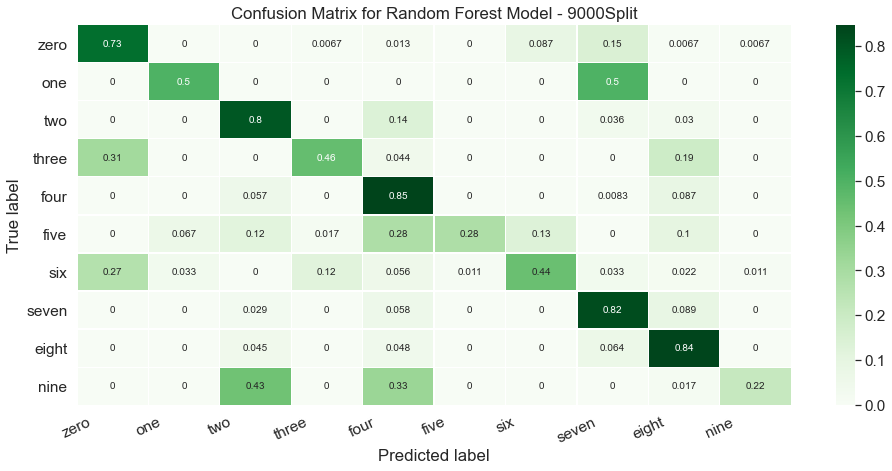

<Figure size 432x288 with 0 Axes>

In [204]:
#define the model to be used 
RF_9000Split = RandomForestClassifier()

#fit this model using the test data
RF_9000Split.fit(X_train_9000Split, y_train_9000Split)

#test this model on the seperated data
y_pred_RF_9000Split = RF_9000Split.predict(X_test_9000Split)

#generate confusion matrix
conf_matrix_RF_9000Split = confusion_matrix(y_test_9000Split, y_pred_RF_9000Split)
conf_matrix_RF_9000Split2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#generate classification report
classification_report_RF_9000Split = classification_report(y_test_9000Split, y_pred_RF_9000Split)

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix_RF_9000Split2, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['zero','one', 'two', 'three', 
               'four', 'five', 'six',    
               'seven','eight','nine']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model - 9000Split')
plt.show()
plt.clf()

#Tree topology metrics
#n_nodes_RF_9000Split = RF_9000Split.tree_.node_count
#depth_RF_9000Split = RF_9000Split.get_depth()
#num_Leaves_RF_9000Split = RF_9000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_9000Split = accuracy_score(y_test_9000Split, y_pred_RF_9000Split)*100

#RF_9000Split_data = [n_nodes_RF_9000Split, depth_RF_9000Split, num_Leaves_RF_9000Split, accuracy_RF_9000Split]

In [205]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_9000Split)
print("\n")
print(classification_report_RF_9000Split)

Confusion Matrix
[[ 455    7   45   47   17    1   10   40   24    0]
 [  40  105   57   18   19    0    0    2   11    0]
 [   3    2 1884    0  262    0    0   88  247    0]
 [  38    2    3  213   14    0    6   24   34    0]
 [  16    0  172    0 2098    0    0   59  442    0]
 [  56   10   37   32   20   63   23   18   28    0]
 [  60    9   46   26   21    0  212   36   14    0]
 [   2    0  217    0  169    0    8 1193  179    0]
 [   4    0  251    0  276    0    7  366 1948    0]
 [   0    0   27    0  175    0    0    3    7   42]]


              precision    recall  f1-score   support

       eight       0.68      0.70      0.69       646
        five       0.78      0.42      0.54       252
        four       0.69      0.76      0.72      2486
        nine       0.63      0.64      0.64       334
         one       0.68      0.75      0.72      2787
       seven       0.98      0.22      0.36       287
         six       0.80      0.50      0.61       424
       three     

<h3>Results Table</h3>

In [206]:
#infoFrames = [RF_crossVal_data, RF_withTestData_data, RF_4000Split_data, RF_9000Split_data]

#RF_Table = pd.DataFrame(infoFrames, columns=["Number of Nodes", "Depth of Tree", "Number of Leaves", "Accuracy" ], index=['Cross Validation','Test Data','4000 Split','9000 Split'])

#RF_Table

<hr>
<h2 style="color:orange"> RandomForests Parameter Exploration </h2>


<i> Goal: To understand how binary splits or multiple branching, pruning,
confidence threshold for pruning, and the minimal number of instances permissible per leaf. </i>

<h3> Binary Splits or Multiple Branching </h3> 

<b><span style="color:orange">N.B.</span></b> Editing this with the RandomForestClassifier is not possible, thus we must hypothesize on its effects.

<h3>Pruning</h3>

The below implementation is heavily influenced by the following article: https://medium.com/swlh/post-pruning-decision-trees-using-python-b5d4bcda8e23 (to view the article in full, open in a new incognito window).

<h4 style="color:orange">Pruning | Cross-Validation</h4>

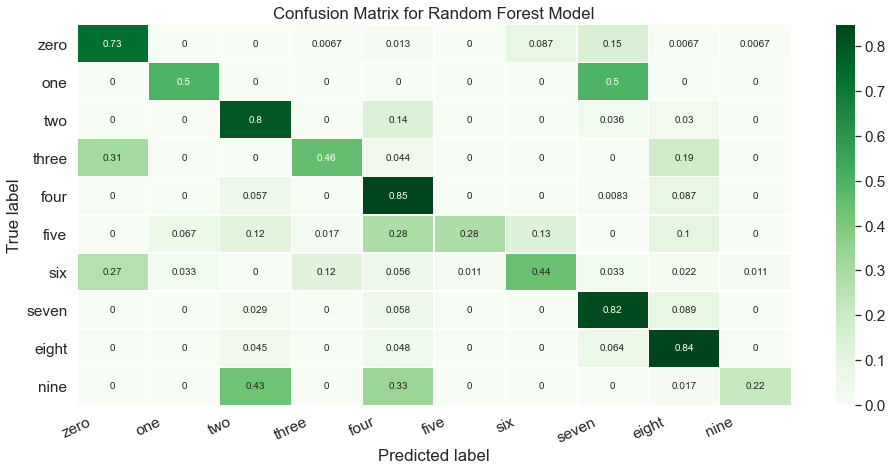



0.0005


Confusion Matrix
[[ 523    0    1    2    8    0    2    2    2    0]
 [   2  196    0    2    1    0    0    1    8    0]
 [   0    0 1940    0   21    0    0    3   16    0]
 [   5    0    0  242   10    1    1    8    3    0]
 [   0    0   19    0 2150    0    0    8   43    0]
 [   3    0    1    0    1  233    1    0    1    0]
 [   3    1    4    0    9    0  335    7    1    0]
 [   0    0    5    0   19    0    0 1355   31    0]
 [   0    0   21    0   38    0    0   15 2176    0]
 [   0    0    4    0   46    0    0    0    1  159]]


              precision    recall  f1-score   support

       eight       0.98      0.97      0.97       540
        five       0.99      0.93      0.96       210
        four       0.97      0.98      0.98      1980
        nine       0.98      0.90      0.94       270
         one       0.93      0.97      0.95      2220
       seven       1.00      0.97      0.98       240
         six       0.99      0.93      0.96       360
      

<Figure size 432x288 with 0 Axes>

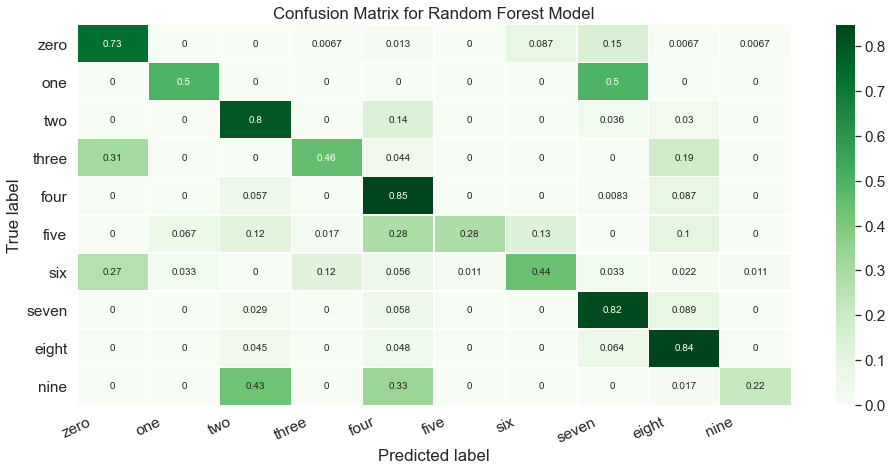



0.001


Confusion Matrix
[[ 510    0    1    1   12    0    3    7    6    0]
 [   4  184    1    3    1    2    2    2   11    0]
 [   0    0 1894    0   61    0    0    4   21    0]
 [   7    0    0  228   14    0    1   11    9    0]
 [   0    0   44    0 2110    0    0   15   51    0]
 [   3    0    1    0    2  230    3    0    1    0]
 [   8    0    7    0   14    0  322    4    5    0]
 [   0    0    6    0   33    0    0 1324   47    0]
 [   0    0   33    0   68    0    0   24 2125    0]
 [   0    0    3    0   79    0    0    0    2  126]]


              precision    recall  f1-score   support

       eight       0.96      0.94      0.95       540
        five       1.00      0.88      0.93       210
        four       0.95      0.96      0.95      1980
        nine       0.98      0.84      0.91       270
         one       0.88      0.95      0.91      2220
       seven       0.99      0.96      0.97       240
         six       0.97      0.89      0.93       360
       

/Users/Rob/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 432x288 with 0 Axes>

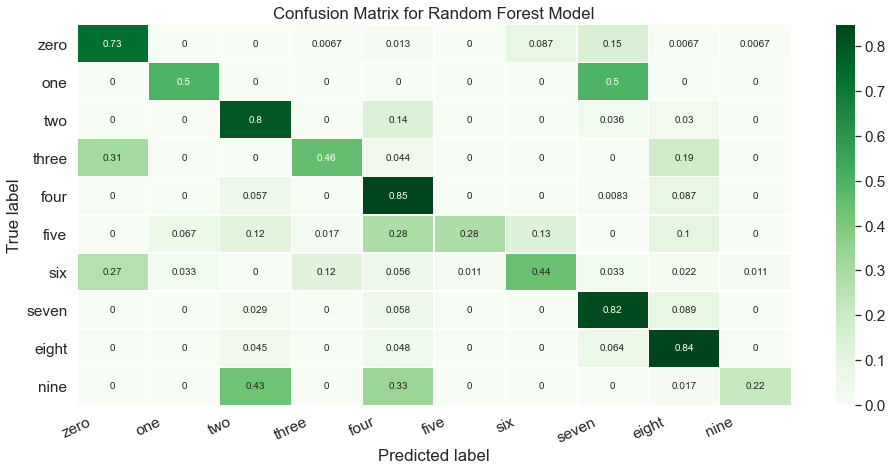



0.005


Confusion Matrix
[[ 318    0   18    2   49    0   21   82   50    0]
 [  68    1   30   10   17    0    0   17   67    0]
 [   0    0 1618    0  197    0    0   18  147    0]
 [  44    0    1   84   21    0    0   45   75    0]
 [   0    0  148    0 1804    0    0   82  186    0]
 [  46    0    6    1   21   59   24   32   51    0]
 [  24    0   12    2   15    0  123  161   23    0]
 [   0    0   39    0   83    0    0 1137  151    0]
 [   0    0  109    0  151    0    0  235 1755    0]
 [   0    0    2    0  202    0    0    4    2    0]]


              precision    recall  f1-score   support

       eight       0.64      0.59      0.61       540
        five       1.00      0.00      0.01       210
        four       0.82      0.82      0.82      1980
        nine       0.85      0.31      0.46       270
         one       0.70      0.81      0.75      2220
       seven       1.00      0.25      0.39       240
         six       0.73      0.34      0.47       360
       

/Users/Rob/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 432x288 with 0 Axes>

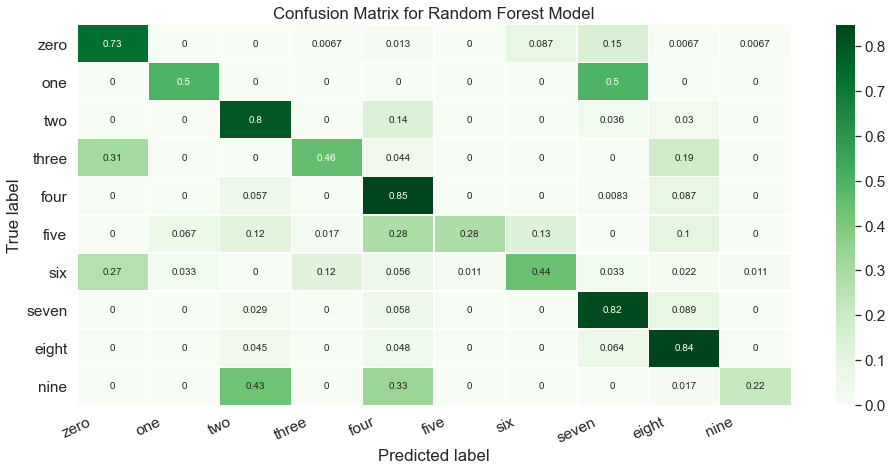



0.01


Confusion Matrix
[[ 113    0    2    0  116    0    0  126  183    0]
 [  16    0   30    0   26    0    0   15  123    0]
 [   0    0 1255    0  347    0    0   90  288    0]
 [  35    0    0    0   23    0    0   35  177    0]
 [   0    0   74    0 1623    0    0  235  288    0]
 [  10    0    2    0   11    0    0   67  150    0]
 [   2    0   20    0   16    0    0  267   55    0]
 [   0    0  108    0  101    0    0  959  242    0]
 [   0    0   75    0  254    0    0  269 1652    0]
 [   0    0    1    0  199    0    0    0   10    0]]


              precision    recall  f1-score   support

       eight       0.64      0.21      0.32       540
        five       0.00      0.00      0.00       210
        four       0.80      0.63      0.71      1980
        nine       0.00      0.00      0.00       270
         one       0.60      0.73      0.66      2220
       seven       0.00      0.00      0.00       240
         six       0.00      0.00      0.00       360
       t

<Figure size 432x288 with 0 Axes>

In [207]:
ccp_values = [0.0005,0.001, 0.005, 0.01]

for i in ccp_values:

    RF_pruned_crossVal = RandomForestClassifier(ccp_alpha = i)
    RF_pruned_crossVal.fit(X_train, y_train)

    #setup cross validation using the above classifier, X_train = data to be classified, y = the labels, CV = number of folds
    cross_validation_scores_RF_pruned = cross_val_score(RF_pruned_crossVal, X_train, y_train, cv=10)

    #train model with 10 fold validation, 
    #cross_val_predict Get predictions from each split of cross-validation for diagnostic purposes.
    y_pred_RF_pruned_crossVal = cross_val_predict(RF_pruned_crossVal, X_train, y_train, cv=10)

    #confusion matrix generation
    conf_matrix_RF_pruned_crossVal = confusion_matrix(y_train, y_pred_RF_pruned_crossVal)
    conf_matrix_RF_pruned_crossVal2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    #accuracy report
    classification_report_RF_pruned_crossVal = classification_report(y_train, y_pred_RF_pruned_crossVal)

    # Build the plot
    plt.figure(figsize=(16,7))
    sns.set(font_scale=1.4)
    sns.heatmap(conf_matrix_RF_pruned_crossVal2, annot=True, annot_kws={'size':10},
                cmap=plt.cm.Greens, linewidths=0.2)

    # Add labels to the plot
    class_names = ['zero','one', 'two', 'three', 
                   'four', 'five', 'six',    
                   'seven','eight','nine']
    tick_marks = np.arange(len(class_names))
    tick_marks2 = tick_marks + 0.5
    plt.xticks(tick_marks, class_names, rotation=25)
    plt.yticks(tick_marks2, class_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix for Random Forest Model')
    plt.show()
    plt.clf()
    
    print('\n')
    print(i)
    print('\n')
    #Print Confusion matrix and other important results
    print("Confusion Matrix")
    print(conf_matrix_RF_pruned_crossVal)
    print("\n")
    print(classification_report_RF_pruned_crossVal)
    print("\n")
#Tree topology metrics
#n_nodes_RF_pruned_crossVal = RF_pruned_crossVal.tree_.node_count
#depth_RF_pruned_crossVal = RF_pruned_crossVal.get_depth()
#num_Leaves_RF_pruned_crossVal = RF_pruned_crossVal.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_pruned_crossVal = accuracy_score(y_train, y_pred_RF_pruned_crossVal)*100

#RF_pruned_crossVal_data = [n_nodes_RF_pruned_crossVal, depth_RF_pruned_crossVal, num_Leaves_RF_pruned_crossVal, accuracy_RF_pruned_crossVal]


<h4 style="color:orange">Pruning | Train-Test Split</h4>

In [17]:
ccp_values = [0.0005,0.001, 0.005, 0.01]

for i in ccp_values:
    #define the model to be used 
    RF_pruned_trainTestSplit = RandomForestClassifier(ccp_alpha= 0.001)

        #fit this model using the test data
    RF_pruned_trainTestSplit.fit(X_splitTrain, y_splitTrain)

    #test this model on the seperated data
    y_pred_RF_pruned_trainTestSplit = RF_pruned_trainTestSplit.predict(X_splitTest)

    #confusion matrix generation
    conf_matrix_RF_pruned_trainTestSplit = confusion_matrix(y_splitTest, y_pred_RF_pruned_trainTestSplit)

    #accuracy report
    classification_report_RF_pruned_trainTestSplit = classification_report(y_splitTest, y_pred_RF_pruned_trainTestSplit)

    #Find the accuracy of this model based on the test data
    accuracy_RF_pruned_trainTestSplit = accuracy_score(y_splitTest, y_pred_RF_pruned_trainTestSplit)*100

    #Print Confusion matrix and other important results
    print("Confusion Matrix")
    print(conf_matrix_RF_pruned_trainTestSplit)
    print("\n")
    print(classification_report_RF_pruned_trainTestSplit)


Confusion Matrix
[[176   0   0   1   6   0   2   3   1   0]
 [  0  47   0   1   0   1   1   3   5   0]
 [  0   0 599   0  20   0   0   2   6   0]
 [  1   0   0  83   6   0   2   3   1   0]
 [  0   0  11   0 713   0   0   6  24   0]
 [  1   0   1   0   1  62   0   0   0   0]
 [  3   0   4   0   5   0  95   2   2   0]
 [  0   0   2   0   8   0   0 440  21   0]
 [  0   0  10   0  26   0   0  11 704   0]
 [  0   0   1   0  31   0   0   0   0  44]]


              precision    recall  f1-score   support

       eight       0.97      0.93      0.95       189
        five       1.00      0.81      0.90        58
        four       0.95      0.96      0.95       627
        nine       0.98      0.86      0.92        96
         one       0.87      0.95      0.91       754
       seven       0.98      0.95      0.97        65
         six       0.95      0.86      0.90       111
       three       0.94      0.93      0.94       471
         two       0.92      0.94      0.93       751
        z

<h4 style="color:orange">Pruning | Test Data</h4>



0.0005


Confusion Matrix
[[110   0   0   5   5   0  11  17   2   0]
 [  0  30   0   0   0   0   0  30   0   0]
 [  1   0 511   0  90   0   0  33  25   0]
 [ 36   0   0  41   3   0   0   0  10   0]
 [  0   0  37   0 618   0   0   7  58   0]
 [  0   3   9   0  10  13  12   0  13   0]
 [ 29   0   0  10  11   0  35   1   3   1]
 [  0   0  10   0  28   0   1 365  46   0]
 [  0   0  32   0  36   0   0  56 626   0]
 [  0   0  27   0  28   0   0   0   0   5]]


              precision    recall  f1-score   support

       eight       0.62      0.73      0.67       150
        five       0.91      0.50      0.65        60
        four       0.82      0.77      0.79       660
        nine       0.73      0.46      0.56        90
         one       0.75      0.86      0.80       720
       seven       1.00      0.22      0.36        60
         six       0.59      0.39      0.47        90
       three       0.72      0.81      0.76       450
         two       0.80      0.83      0.82       75

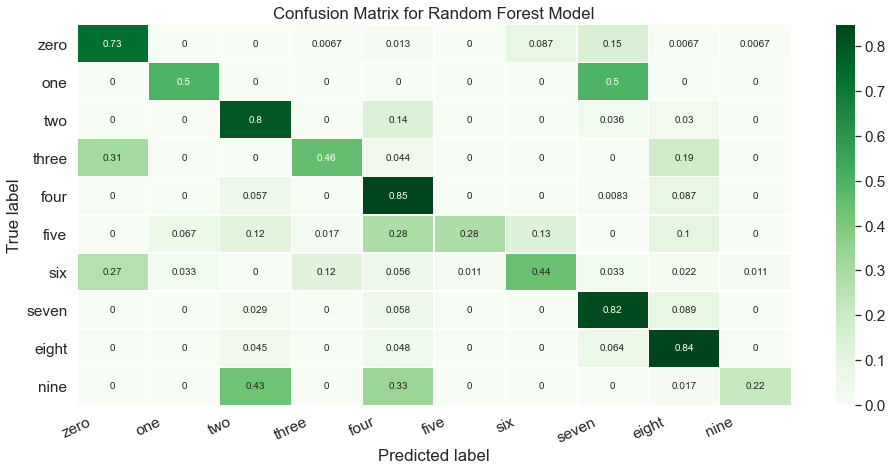



0.001


Confusion Matrix
[[102   0   0   2   8   0  14  20   4   0]
 [  0  29   0   0   0   0   0  30   1   0]
 [  0   0 525   0  89   0   0  18  28   0]
 [ 40   0   0  39   1   0   0   0  10   0]
 [  0   0  34   0 612   0   0  11  63   0]
 [  0   4   8   0  10  15   7   0  16   0]
 [ 30   0   0   9  15   0  34   1   1   0]
 [  0   0  12   0  31   0   0 355  52   0]
 [  0   0  29   0  48   0   0  54 619   0]
 [  0   0  23   0  31   0   0   0   2   4]]


              precision    recall  f1-score   support

       eight       0.59      0.68      0.63       150
        five       0.88      0.48      0.62        60
        four       0.83      0.80      0.81       660
        nine       0.78      0.43      0.56        90
         one       0.72      0.85      0.78       720
       seven       1.00      0.25      0.40        60
         six       0.62      0.38      0.47        90
       three       0.73      0.79      0.76       450
         two       0.78      0.83      0.80       750

<Figure size 432x288 with 0 Axes>

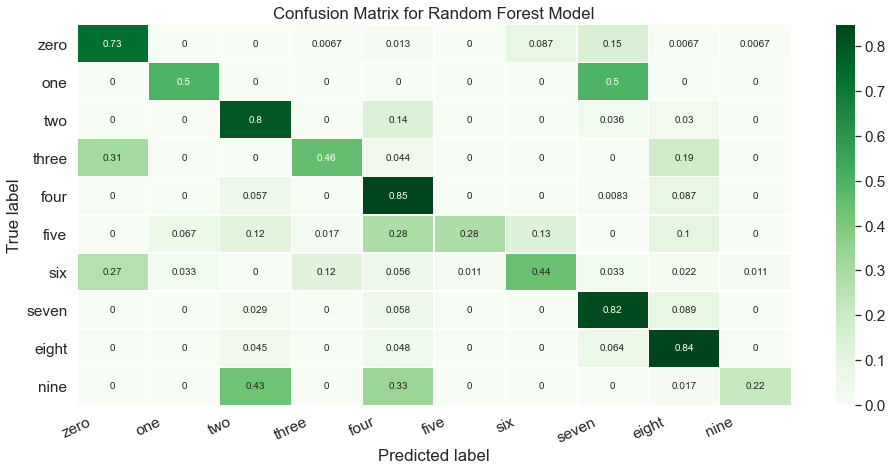



0.005


Confusion Matrix
[[ 72   0   0   1  14   0   4  37  22   0]
 [ 24   0   3   0   0   0   0  27   6   0]
 [  0   0 417   0 123   0   0  55  65   0]
 [ 38   0   0  26   1   0   0   1  24   0]
 [  0   0  51   0 563   0   0  32  74   0]
 [ 10   0   2   0  25   0   0   0  23   0]
 [ 38   0   0   0  17   0   0  20  15   0]
 [  0   0  12   0  47   0   0 304  87   0]
 [  0   0  20   0  52   0   0 144 534   0]
 [  0   0   7   0  51   0   0   0   2   0]]


              precision    recall  f1-score   support

       eight       0.40      0.48      0.43       150
        five       0.00      0.00      0.00        60
        four       0.81      0.63      0.71       660
        nine       0.96      0.29      0.44        90
         one       0.63      0.78      0.70       720
       seven       0.00      0.00      0.00        60
         six       0.00      0.00      0.00        90
       three       0.49      0.68      0.57       450
         two       0.63      0.71      0.67       750

/Users/Rob/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 432x288 with 0 Axes>

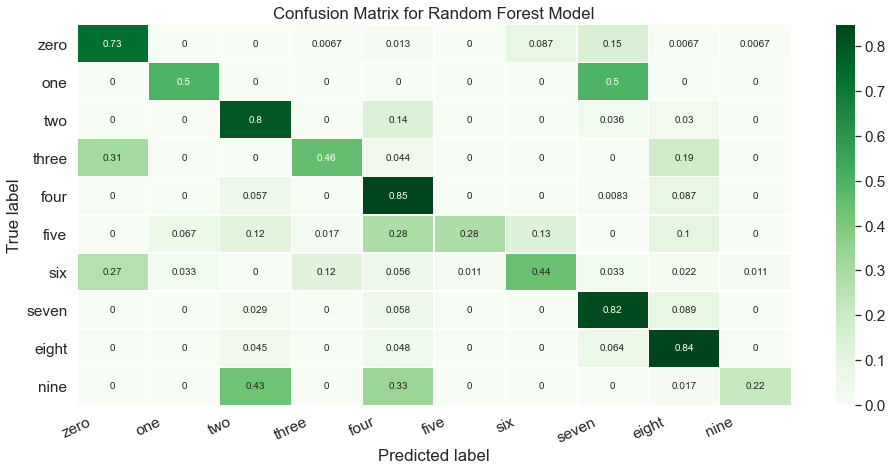



0.01


Confusion Matrix
[[ 21   0   0   0  14   0   0  40  75   0]
 [  9   0  30   0   0   0   0   0  21   0]
 [  0   0 326   0 168   0   0  88  78   0]
 [ 11   0   0   0   3   0   0   1  75   0]
 [  0   0  15   0 567   0   0  56  82   0]
 [  0   0   3   0  10   0   0   0  47   0]
 [  9   0   0   0  18   0   0  16  47   0]
 [  0   0   2   0  56   0   0 270 122   0]
 [  0   0   3   0  85   0   0 161 501   0]
 [  0   0   1   0  59   0   0   0   0   0]]


              precision    recall  f1-score   support

       eight       0.42      0.14      0.21       150
        five       0.00      0.00      0.00        60
        four       0.86      0.49      0.63       660
        nine       0.00      0.00      0.00        90
         one       0.58      0.79      0.67       720
       seven       0.00      0.00      0.00        60
         six       0.00      0.00      0.00        90
       three       0.43      0.60      0.50       450
         two       0.48      0.67      0.56       750


/Users/Rob/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 432x288 with 0 Axes>

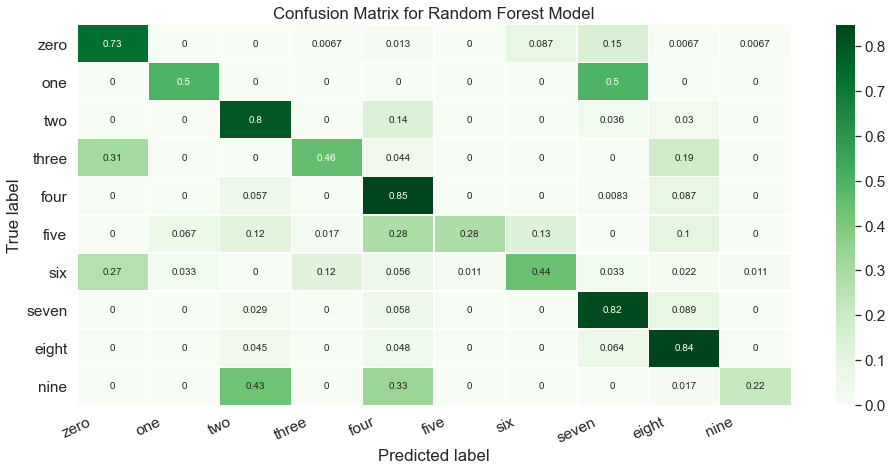

<Figure size 432x288 with 0 Axes>

In [208]:
ccp_values = [0.0005,0.001, 0.005, 0.01]

for i in ccp_values:
    #define the model to be used 
    RF_pruned_testData = RandomForestClassifier(ccp_alpha=i)

    #fit this model using the test data
    RF_pruned_testData.fit(X_train, y_train)

    #test this model on the seperated data
    y_pred_RF_pruned_testData = RF_pruned_testData.predict(X_test)

    #generate confusion matrix
    conf_matrix_RF_pruned_testData = confusion_matrix(y_test, y_pred_RF_pruned_testData)
    conf_matrix_RF_pruned_testData2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    #generate classification report
    classification_report_RF_pruned_testData = classification_report(y_test, y_pred_RF_pruned_testData)

    # Build the plot
    plt.figure(figsize=(16,7))
    sns.set(font_scale=1.4)
    sns.heatmap(conf_matrix_RF_pruned_testData2, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

    # Add labels to the plot
    class_names = ['zero','one', 'two', 'three', 
                   'four', 'five', 'six',    
                   'seven','eight','nine']
    tick_marks = np.arange(len(class_names))
    tick_marks2 = tick_marks + 0.5
    plt.xticks(tick_marks, class_names, rotation=25)
    plt.yticks(tick_marks2, class_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix for Random Forest Model')
    
    #Print Confusion matrix and other important results
    
    print('\n')
    print(i)
    print('\n')
    print("Confusion Matrix")
    print(conf_matrix_RF_pruned_testData)
    print("\n")
    print(classification_report_RF_pruned_testData)
    print('\n')
    plt.show()
    plt.clf()
#Tree topology metrics
#n_nodes_RF_pruned_testData = RF_pruned_testData.tree_.node_count
#depth_RF_pruned_testData = RF_pruned_testData.get_depth()
#num_Leaves_RF_pruned_testData = RF_pruned_testData.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_pruned_testData = accuracy_score(y_test, y_pred_RF_pruned_testData)*100

#RF_pruned_testData_data = [n_nodes_RF_pruned_testData, depth_RF_pruned_testData, num_Leaves_RF_pruned_testData, accuracy_RF_pruned_testData]


<h4 style="color:orange">Pruning | 4000 Split</h4>



0.0005


Confusion Matrix
[[ 311    0    0    3    5    0   13   26    4    1]
 [   0   96    6    1    0    1    0   30    5    0]
 [   1    0 1286    0  113    0    0   12   34    0]
 [  39    0    0  149    5    0    2    4   13    0]
 [   0    0   58    0 1492    0    0    8   90    0]
 [   3    8   26    1    2  116    4    0    5    0]
 [  35    1    0   10   15    0  169    5    6    0]
 [   0    0   15    0   46    0    0  931   73    0]
 [   0    0   44    0   74    0    0   71 1474    0]
 [   0    0   22    0   62    0    0    0    0   64]]


              precision    recall  f1-score   support

       eight       0.80      0.86      0.83       363
        five       0.91      0.69      0.79       139
        four       0.88      0.89      0.89      1446
        nine       0.91      0.70      0.79       212
         one       0.82      0.91      0.86      1648
       seven       0.99      0.70      0.82       165
         six       0.90      0.70      0.79       241
      

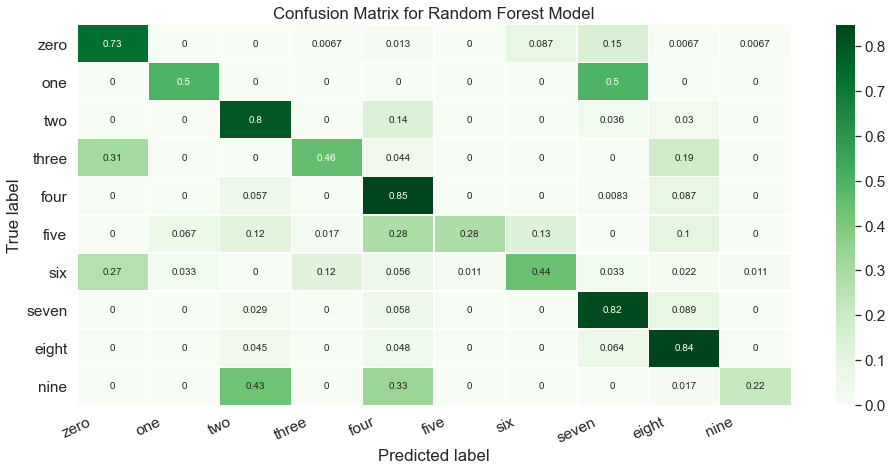



0.001


Confusion Matrix
[[ 305    0    1    4    8    0   14   25    6    0]
 [   3   89   13    4    1    0    1   26    2    0]
 [   0    0 1279    0  121    0    0   21   25    0]
 [  39    0    0  144   10    0    2    4   13    0]
 [   0    0   60    0 1489    0    0   15   84    0]
 [   3    0   17    4   14  115    4    0    8    0]
 [  41    0    2    6   16    0  166    3    6    1]
 [   0    0   11    0   52    0    0  921   81    0]
 [   0    0   50    0   77    0    0   68 1468    0]
 [   0    0   31    0   59    0    0    0    1   57]]


              precision    recall  f1-score   support

       eight       0.78      0.84      0.81       363
        five       1.00      0.64      0.78       139
        four       0.87      0.88      0.88      1446
        nine       0.89      0.68      0.77       212
         one       0.81      0.90      0.85      1648
       seven       1.00      0.70      0.82       165
         six       0.89      0.69      0.78       241
       

<Figure size 432x288 with 0 Axes>

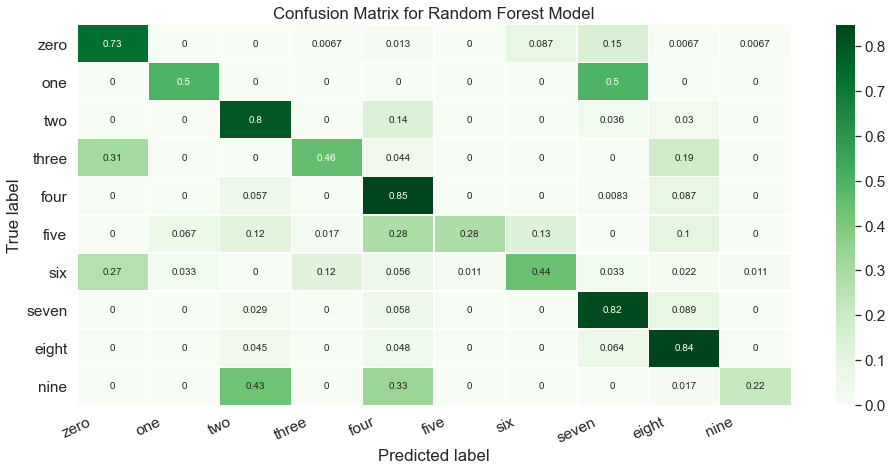

/Users/Rob/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




0.005


Confusion Matrix
[[ 204    0    7    0   21    0   26   65   40    0]
 [  52    5   42    1    5    0    1    9   24    0]
 [   0    0 1121    0  176    0    0   35  114    0]
 [  47    0    0   61   10    0    1   16   77    0]
 [   0    0   98    0 1321    0    0   59  170    0]
 [  32    0    3    0   16   27   15   10   62    0]
 [  50    0    4    1   22    0   58   83   23    0]
 [   0    0   17    0   75    0    0  782  191    0]
 [   0    0   76    0  121    0    0  201 1265    0]
 [   0    0    4    0  143    0    0    0    1    0]]


              precision    recall  f1-score   support

       eight       0.53      0.56      0.55       363
        five       1.00      0.04      0.07       139
        four       0.82      0.78      0.80      1446
        nine       0.97      0.29      0.44       212
         one       0.69      0.80      0.74      1648
       seven       1.00      0.16      0.28       165
         six       0.57      0.24      0.34       241
       

<Figure size 432x288 with 0 Axes>

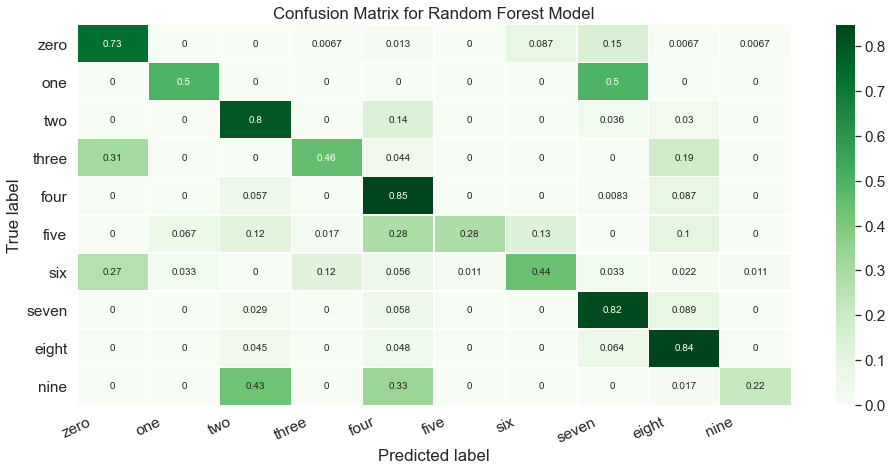



0.01


Confusion Matrix
[[ 115    0    9    0   63    0    0   86   90    0]
 [  28    0   44    0    8    0    0    4   55    0]
 [   0    0  888    0  301    0    0   73  184    0]
 [  48    0    1    0   16    0    0   11  136    0]
 [   0    0   54    0 1239    0    0  108  247    0]
 [  28    0    4    0   19    0    0   21   93    0]
 [  29    0   13    0   23    0    0  112   64    0]
 [   0    0   64    0   96    0    0  622  283    0]
 [   0    0   49    0  175    0    0  240 1199    0]
 [   0    0    0    0  145    0    0    0    3    0]]


              precision    recall  f1-score   support

       eight       0.46      0.32      0.38       363
        five       0.00      0.00      0.00       139
        four       0.79      0.61      0.69      1446
        nine       0.00      0.00      0.00       212
         one       0.59      0.75      0.66      1648
       seven       0.00      0.00      0.00       165
         six       0.00      0.00      0.00       241
       t

/Users/Rob/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 432x288 with 0 Axes>

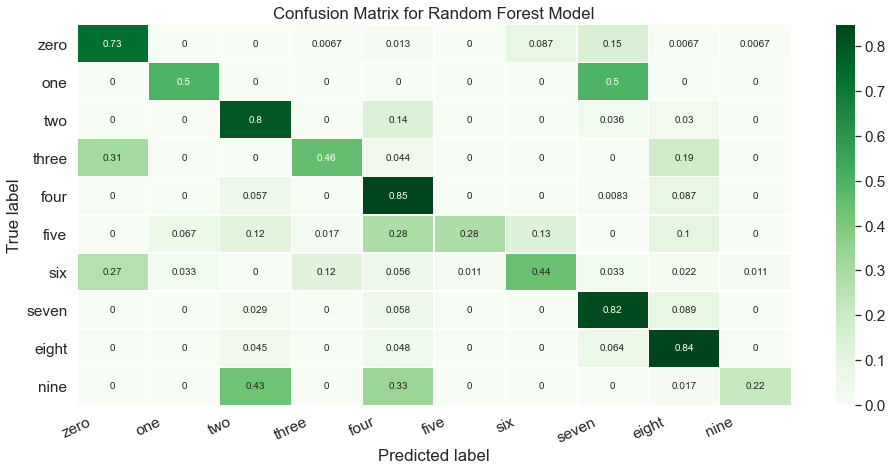

<Figure size 432x288 with 0 Axes>

In [209]:
ccp_values = [0.0005,0.001, 0.005, 0.01]

for i in ccp_values:

    #define the model to be used 
    RF_pruned_4000Split = RandomForestClassifier(ccp_alpha = i)

    #fit this model using the test data
    RF_pruned_4000Split.fit(X_train_4000Split, y_train_4000Split)

    #test this model on the seperated data
    y_pred_RF_pruned_4000Split = RF_pruned_4000Split.predict(X_test_4000Split)

    #generate confusion matrix
    conf_matrix_RF_pruned_4000Split = confusion_matrix(y_test_4000Split, y_pred_RF_pruned_4000Split)
    conf_matrix_RF_pruned_4000Split2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    #generate classification report
    classification_report_RF_pruned_4000Split = classification_report(y_test_4000Split, y_pred_RF_pruned_4000Split)

    # Build the plot
    plt.figure(figsize=(16,7))
    sns.set(font_scale=1.4)
    sns.heatmap(conf_matrix_RF_pruned_4000Split2, annot=True, annot_kws={'size':10},
                cmap=plt.cm.Greens, linewidths=0.2)

    # Add labels to the plot
    class_names = ['zero','one', 'two', 'three', 
                   'four', 'five', 'six',    
                   'seven','eight','nine']
    tick_marks = np.arange(len(class_names))
    tick_marks2 = tick_marks + 0.5
    plt.xticks(tick_marks, class_names, rotation=25)
    plt.yticks(tick_marks2, class_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix for Random Forest Model')
    
    print('\n')
    print(i)
    print('\n')
    #Print Confusion matrix and other important results
    print("Confusion Matrix")
    print(conf_matrix_RF_pruned_4000Split)
    print("\n")
    print(classification_report_RF_pruned_4000Split)
    print('\n')
    plt.show()
    plt.clf()
#Tree topology metrics
#n_nodes_RF_pruned_4000Split = RF_pruned_4000Split.tree_.node_count
#depth_RF_pruned_4000Split = RF_pruned_4000Split.get_depth()
#num_Leaves_RF_pruned_4000Split = RF_pruned_4000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_pruned_4000Split = accuracy_score(y_test_4000Split, y_pred_RF_pruned_4000Split)*100

#RF_pruned_4000Split_data = [n_nodes_RF_pruned_4000Split, depth_RF_pruned_4000Split, num_Leaves_RF_pruned_4000Split, accuracy_RF_pruned_4000Split]


<h4 style="color:orange">Pruning | 9000 Split</h4>

In [18]:
ccp_values = [0.0005,0.001, 0.005, 0.01]

for i in ccp_values:
    #define the model to be used 
    RF_pruned_9000Split = RandomForestClassifier(ccp_alpha = i)

    #fit this model using the test data
    RF_pruned_9000Split.fit(X_train_9000Split, y_train_9000Split)

    #test this model on the seperated data
    y_pred_RF_pruned_9000Split = RF_pruned_9000Split.predict(X_test_9000Split)

    #generate confusion matrix
    conf_matrix_RF_pruned_9000Split = confusion_matrix(y_test_9000Split, y_pred_RF_pruned_9000Split)
    conf_matrix_RF_pruned_9000Split2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    #generate classification report
    classification_report_RF_pruned_9000Split = classification_report(y_test_9000Split, y_pred_RF_pruned_9000Split)

    # Build the plot
    plt.figure(figsize=(16,7))
    sns.set(font_scale=1.4)
    sns.heatmap(conf_matrix_RF_pruned_9000Split2, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

    # Add labels to the plot
    class_names = ['zero','one', 'two', 'three', 
                   'four', 'five', 'six',    
                   'seven','eight','nine']
    tick_marks = np.arange(len(class_names))
    tick_marks2 = tick_marks + 0.5
    plt.xticks(tick_marks, class_names, rotation=25)
    plt.yticks(tick_marks2, class_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix for Random Forest Model')
    plt.show()
    plt.clf()
    
    print('\n')
    print(i)
    print('\n')
    #Print Confusion matrix and other important results
    print("Confusion Matrix")
    print(conf_matrix_RF_pruned_9000Split)
    print("\n")
    print(classification_report_RF_pruned_9000Split)
    print("\n")
#Tree topology metrics
#n_nodes_RF_pruned_9000Split = RF_pruned_9000Split.tree_.node_count
#depth_RF_pruned_9000Split = RF_pruned_9000Split.get_depth()
#num_Leaves_RF_pruned_9000Split = RF_pruned_9000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_pruned_9000Split = accuracy_score(y_test_9000Split, y_pred_RF_pruned_9000Split)*100

#RF_pruned_9000Split_data = [n_nodes_RF_pruned_9000Split, depth_RF_pruned_9000Split, num_Leaves_RF_pruned_9000Split, accuracy_RF_pruned_9000Split]


NameError: name 'matrix' is not defined

In [ ]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_pruned_9000Split)
print("\n")
print(classification_report_RF_pruned_9000Split)

<h4 style="color:orange">Pruning | Exploratory</h4>

In [ ]:
ccp_values = [0.0005,0.001, 0.005, 0.01]

for i in ccp_values:
    #define the model to be used 
    RF_pruned_Explore = RandomForestClassifier(ccp_alpha = i)

    #fit this model using the test data
    RF_pruned_Explore.fit(X_train_Explore, y_train_Explore)

    #test this model on the seperated data
    y_pred_RF_pruned_Explore = RF_pruned_Explore.predict(X_test_Explore)

    #generate confusion matrix
    conf_matrix_RF_pruned_Explore = confusion_matrix(y_test_Explore, y_pred_RF_pruned_Explore)
    conf_matrix_RF_pruned_Explore2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    #generate classification report
    classification_report_RF_pruned_Explore = classification_report(y_test_Explore, y_pred_RF_pruned_Explore)

    # Build the plot
    plt.figure(figsize=(16,7))
    sns.set(font_scale=1.4)
    sns.heatmap(conf_matrix_RF_pruned_Explore2, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

    # Add labels to the plot
    class_names = ['zero','one', 'two', 'three', 
                   'four', 'five', 'six',    
                   'seven','eight','nine']
    tick_marks = np.arange(len(class_names))
    tick_marks2 = tick_marks + 0.5
    plt.xticks(tick_marks, class_names, rotation=25)
    plt.yticks(tick_marks2, class_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix for Random Forest Model')
    plt.show()
    plt.clf()
    
    print('\n')
    print(i)
    print('\n')
    #Print Confusion matrix and other important results
    print("Confusion Matrix")
    print(conf_matrix_RF_pruned_Explore)
    print("\n")
    print(classification_report_RF_pruned_Explore)
    print("\n")
#Tree topology metrics
#n_nodes_RF_pruned_9000Split = RF_pruned_9000Split.tree_.node_count
#depth_RF_pruned_9000Split = RF_pruned_9000Split.get_depth()
#num_Leaves_RF_pruned_9000Split = RF_pruned_9000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_pruned_9000Split = accuracy_score(y_test_9000Split, y_pred_RF_pruned_9000Split)*100

#RF_pruned_9000Split_data = [n_nodes_RF_pruned_9000Split, depth_RF_pruned_9000Split, num_Leaves_RF_pruned_9000Split, accuracy_RF_pruned_9000Split]


<h3 style="color:orange">Pruning | Summary Table</h3>

In [213]:
#infoFrames2 = [RF_pruned_crossVal_data, RF_pruned_testData_data, RF_pruned_4000Split_data, RF_pruned_9000Split_data]

#RF_Table_pruned = pd.DataFrame(infoFrames2, columns=["Number of Nodes", "Depth of Tree", "Number of Leaves", "Accuracy" ], index=['Cross Validation','Test Data','4000 Split','9000 Split'])

#RF_Table_pruned

<hr>
<h2> nEstimators</h2>

<h4 style="color:orange">nEstimators | Cross Validation</h4>

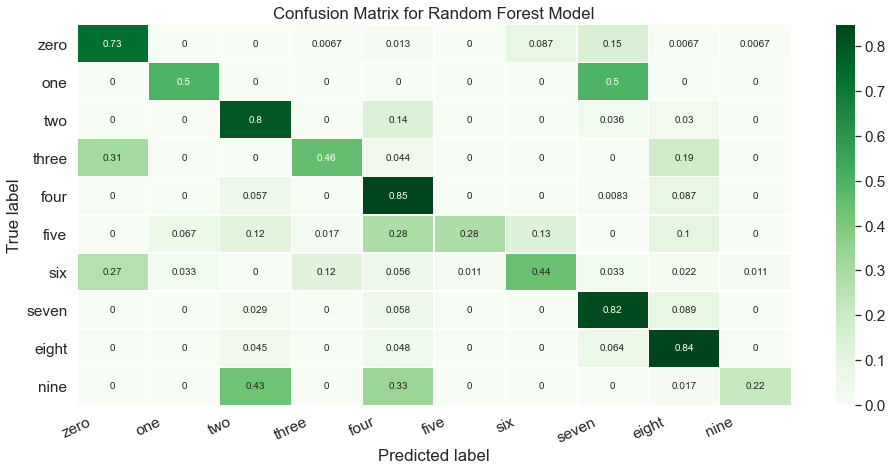



50


Confusion Matrix
[[ 526    0    1    1    6    0    4    2    0    0]
 [   1  202    0    2    2    1    0    0    2    0]
 [   0    0 1957    0   12    0    0    1   10    0]
 [   3    0    1  249    4    0    0    5    8    0]
 [   0    0   11    0 2167    0    0    4   38    0]
 [   0    0    1    0    0  239    0    0    0    0]
 [   5    0    4    1    7    0  336    6    1    0]
 [   0    0    3    0   16    0    0 1365   26    0]
 [   0    0   15    0   32    0    0    7 2196    0]
 [   0    0    3    0   24    0    0    0    3  180]]


              precision    recall  f1-score   support

       eight       0.98      0.97      0.98       540
        five       1.00      0.96      0.98       210
        four       0.98      0.99      0.98      1980
        nine       0.98      0.92      0.95       270
         one       0.95      0.98      0.97      2220
       seven       1.00      1.00      1.00       240
         six       0.99      0.93      0.96       360
       thr

<Figure size 432x288 with 0 Axes>

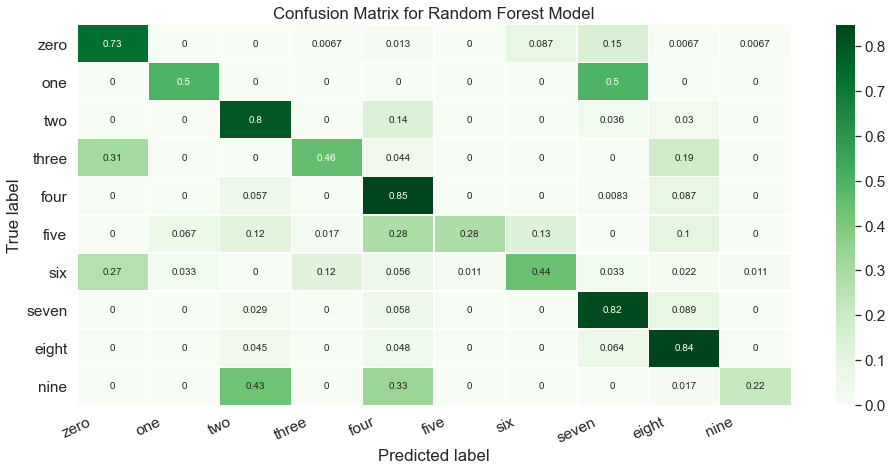



100


Confusion Matrix
[[ 527    0    0    1    5    0    2    3    2    0]
 [   1  203    1    1    0    0    0    0    4    0]
 [   0    0 1953    0   13    0    0    2   12    0]
 [   4    0    0  253    5    0    2    3    3    0]
 [   0    0   11    0 2178    0    0    4   27    0]
 [   0    0    1    0    1  238    0    0    0    0]
 [   2    0    3    0    9    0  343    2    1    0]
 [   0    0    2    0   13    0    1 1375   19    0]
 [   0    0   17    0   22    0    0    8 2203    0]
 [   0    0    1    0   23    0    0    0    3  183]]


              precision    recall  f1-score   support

       eight       0.99      0.98      0.98       540
        five       1.00      0.97      0.98       210
        four       0.98      0.99      0.98      1980
        nine       0.99      0.94      0.96       270
         one       0.96      0.98      0.97      2220
       seven       1.00      0.99      1.00       240
         six       0.99      0.95      0.97       360
       th

<Figure size 432x288 with 0 Axes>

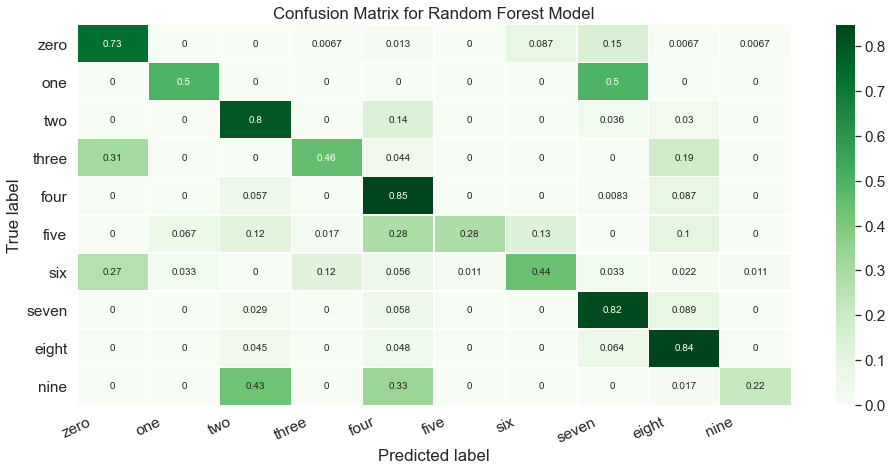



150


Confusion Matrix
[[ 526    0    0    1    8    0    1    3    1    0]
 [   1  202    0    1    0    1    0    0    5    0]
 [   0    0 1961    0    9    0    0    2    8    0]
 [   1    0    0  254    6    0    2    5    2    0]
 [   0    0   14    0 2179    0    0    4   23    0]
 [   0    0    1    0    1  238    0    0    0    0]
 [   2    0    3    0    7    0  343    3    2    0]
 [   0    0    2    0   14    0    0 1379   15    0]
 [   0    0   11    0   21    0    0    7 2211    0]
 [   0    0    4    0   21    0    0    0    2  183]]


              precision    recall  f1-score   support

       eight       0.99      0.97      0.98       540
        five       1.00      0.96      0.98       210
        four       0.98      0.99      0.99      1980
        nine       0.99      0.94      0.97       270
         one       0.96      0.98      0.97      2220
       seven       1.00      0.99      0.99       240
         six       0.99      0.95      0.97       360
       th

<Figure size 432x288 with 0 Axes>

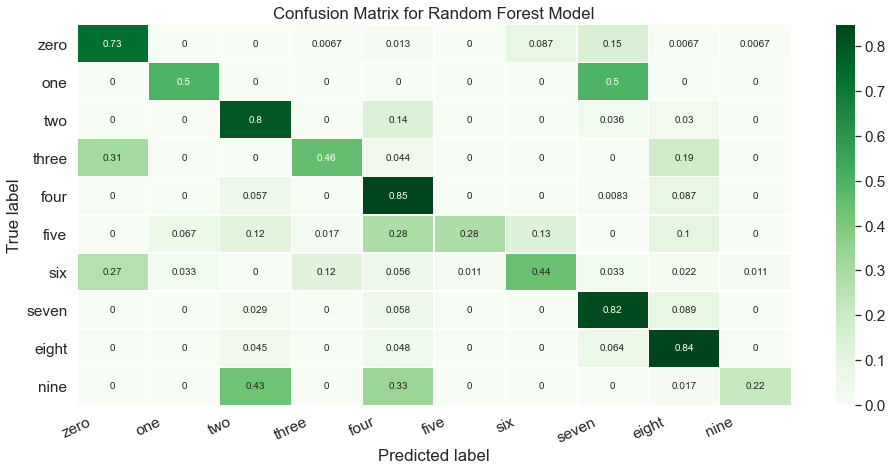



200


Confusion Matrix
[[ 530    0    1    1    6    0    1    1    0    0]
 [   1  204    0    1    1    1    0    0    2    0]
 [   0    0 1958    0   11    0    0    1   10    0]
 [   3    0    0  255    4    0    3    2    3    0]
 [   0    0    9    0 2186    0    0    4   21    0]
 [   0    0    1    0    1  238    0    0    0    0]
 [   1    0    3    0    6    0  346    3    1    0]
 [   0    0    1    0   12    0    0 1378   19    0]
 [   0    0   14    0   14    0    0    7 2215    0]
 [   0    0    2    0   19    0    0    0    1  188]]


              precision    recall  f1-score   support

       eight       0.99      0.98      0.99       540
        five       1.00      0.97      0.99       210
        four       0.98      0.99      0.99      1980
        nine       0.99      0.94      0.97       270
         one       0.97      0.98      0.98      2220
       seven       1.00      0.99      0.99       240
         six       0.99      0.96      0.97       360
       th

<Figure size 432x288 with 0 Axes>

In [214]:
nEstimator_values = [50, 100, 150, 200]

for i in nEstimator_values:

    RF_pruned_crossValhigherPrun = RandomForestClassifier(n_estimators = i)
    RF_pruned_crossValhigherPrun.fit(X_train, y_train)

    #setup cross validation using the above classifier, X_train = data to be classified, y = the labels, CV = number of folds
    cross_validation_scores_RF_prunedhigherPrun = cross_val_score(RF_pruned_crossValhigherPrun, X_train, y_train, cv=10)

    #train model with 10 fold validation, 
    #cross_val_predict Get predictions from each split of cross-validation for diagnostic purposes.
    y_pred_RF_pruned_crossValhigherPrun = cross_val_predict(RF_pruned_crossValhigherPrun, X_train, y_train, cv=10)

    #confusion matrix generation
    conf_matrix_RF_pruned_crossValhigherPrun = confusion_matrix(y_train, y_pred_RF_pruned_crossValhigherPrun)
    conf_matrix_RF_pruned_crossValhigherPrun_2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    #accuracy report
    classification_report_RF_pruned_crossValhigherPrun = classification_report(y_train, y_pred_RF_pruned_crossValhigherPrun)

    # Build the plot
    plt.figure(figsize=(16,7))
    sns.set(font_scale=1.4)
    sns.heatmap(conf_matrix_RF_pruned_crossValhigherPrun_2, annot=True, annot_kws={'size':10},
                cmap=plt.cm.Greens, linewidths=0.2)

    # Add labels to the plot
    class_names = ['zero','one', 'two', 'three', 
                   'four', 'five', 'six',    
                   'seven','eight','nine']
    tick_marks = np.arange(len(class_names))
    tick_marks2 = tick_marks + 0.5
    plt.xticks(tick_marks, class_names, rotation=25)
    plt.yticks(tick_marks2, class_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix for Random Forest Model')
    plt.show()
    plt.clf()
    
    print("\n")
    print(i)
    print("\n")
    #Print Confusion matrix and other important results
    print("Confusion Matrix")
    print(conf_matrix_RF_pruned_crossValhigherPrun)
    print("\n")
    print(classification_report_RF_pruned_crossValhigherPrun)
    print("\n")
#Tree topology metrics
#n_nodes_RF_pruned_crossVal = RF_pruned_crossVal.tree_.node_count
#depth_RF_pruned_crossVal = RF_pruned_crossVal.get_depth()
#num_Leaves_RF_pruned_crossVal = RF_pruned_crossVal.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_pruned_crossVal = accuracy_score(y_train, y_pred_RF_pruned_crossVal)*100

#RF_pruned_crossVal_data = [n_nodes_RF_pruned_crossVal, depth_RF_pruned_crossVal, num_Leaves_RF_pruned_crossVal, accuracy_RF_pruned_crossVal]


Train/Test Split

In [20]:
nEstimator_values = [50, 100, 150, 200]

for i in nEstimator_values:

    #define the model to be used 
    RF_nEstimators_testData = RandomForestClassifier(n_estimators = i)

    #fit this model using the test data
    RF_nEstimators_testData.fit(X_splitTrain, y_splitTrain)

    #test this model on the seperated data
    y_pred_RF_nEstimators_testData = RF_nEstimators_testData.predict(X_splitTest)

    #generate confusion matrix
    conf_matrix_RF_nEstimators_testData = confusion_matrix(y_splitTest, y_pred_RF_nEstimators_testData)

    #generate classification report
    classification_report_RF_nEstimators_testData = classification_report(y_splitTest, y_pred_RF_nEstimators_testData)
    
    print('\n')
    print(i)
    print('\n')
    #Print Confusion matrix and other important results
    print("Confusion Matrix")
    print(conf_matrix_RF_nEstimators_testData)
    print("\n")
    print(classification_report_RF_nEstimators_testData)
    print('\n')



50


Confusion Matrix
[[183   0   0   1   2   1   0   1   1   0]
 [  0  49   0   1   0   1   0   2   5   0]
 [  0   0 611   0  10   0   0   0   6   0]
 [  0   0   0  86   5   1   2   2   0   0]
 [  0   0  11   0 726   0   0   4  13   0]
 [  0   0   0   0   1  64   0   0   0   0]
 [  1   0   1   1   4   0 102   2   0   0]
 [  0   0   0   0   6   0   0 455  10   0]
 [  0   0  12   0  21   0   0   6 712   0]
 [  0   0   2   0  14   0   0   0   0  60]]


              precision    recall  f1-score   support

       eight       0.99      0.97      0.98       189
        five       1.00      0.84      0.92        58
        four       0.96      0.97      0.97       627
        nine       0.97      0.90      0.93        96
         one       0.92      0.96      0.94       754
       seven       0.96      0.98      0.97        65
         six       0.98      0.92      0.95       111
       three       0.96      0.97      0.97       471
         two       0.95      0.95      0.95       751
  

<h4 style="color:orange">nEstimators | Test Data</h4>

In [15]:
nEstimator_values = [50, 100, 150, 200]

for i in nEstimator_values:

    #define the model to be used 
    RF_pruned_testDatahigherPrun = RandomForestClassifier(n_estimators = i)

    #fit this model using the test data
    RF_pruned_testDatahigherPrun.fit(X_train, y_train)

    #test this model on the seperated data
    y_pred_RF_pruned_testDatahigherPrun = RF_pruned_testDatahigherPrun.predict(X_test)

    #generate confusion matrix
    conf_matrix_RF_pruned_testDatahigherPrun = confusion_matrix(y_test, y_pred_RF_pruned_testDatahigherPrun)

    #generate classification report
    classification_report_RF_pruned_testDatahigherPrun = classification_report(y_test, y_pred_RF_pruned_testDatahigherPrun)
    
    print('\n')
    print(i)
    print('\n')
    #Print Confusion matrix and other important results
    print("Confusion Matrix")
    print(conf_matrix_RF_pruned_testDatahigherPrun)
    print("\n")
    print(classification_report_RF_pruned_testDatahigherPrun)
    print('\n')
#Tree topology metrics
#n_nodes_RF_pruned_testData = RF_pruned_testData.tree_.node_count
#depth_RF_pruned_testData = RF_pruned_testData.get_depth()
#num_Leaves_RF_pruned_testData = RF_pruned_testData.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_pruned_testData = accuracy_score(y_test, y_pred_RF_pruned_testData)*100

#RF_pruned_testData_data = [n_nodes_RF_pruned_testData, depth_RF_pruned_testData, num_Leaves_RF_pruned_testData, accuracy_RF_pruned_testData]




50


Confusion Matrix
[[107   3   3   3   5   0  15  12   1   1]
 [  1  29   0   0   0   0   0  30   0   0]
 [  1   0 517   0  96   0   0  25  21   0]
 [ 42   0   0  41   4   0   0   0   3   0]
 [  2   0  36   0 625   0   0   7  50   0]
 [  1  12  10   1   6  20   2   0   8   0]
 [ 26   4   2  12   7   1  36   0   2   0]
 [  0   0  14   0  29   0   0 358  49   0]
 [  1   0  35   0  36   0   0  51 627   0]
 [  0   0  20   0  28   0   0   0   3   9]]


              precision    recall  f1-score   support

       eight       0.59      0.71      0.65       150
        five       0.60      0.48      0.54        60
        four       0.81      0.78      0.80       660
        nine       0.72      0.46      0.56        90
         one       0.75      0.87      0.80       720
       seven       0.95      0.33      0.49        60
         six       0.68      0.40      0.50        90
       three       0.74      0.80      0.77       450
         two       0.82      0.84      0.83       750
  

<h4 style="color:orange">nEstimators | 4000 Split</h4>

In [16]:
nEstimator_values = [50, 100, 150, 200]

for i in nEstimator_values:

    #define the model to be used 
    RF_pruned_4000SplithigherPrun = RandomForestClassifier(n_estimators = i)

    #fit this model using the test data
    RF_pruned_4000SplithigherPrun.fit(X_train_4000Split, y_train_4000Split)

    #test this model on the seperated data
    y_pred_RF_pruned_4000SplithigherPrun = RF_pruned_4000SplithigherPrun.predict(X_test_4000Split)

    #generate confusion matrix
    conf_matrix_RF_pruned_4000SplithigherPrun = confusion_matrix(y_test_4000Split, y_pred_RF_pruned_4000SplithigherPrun)

    #generate classification report
    classification_report_RF_pruned_4000SplithigherPrun = classification_report(y_test_4000Split, y_pred_RF_pruned_4000SplithigherPrun)
    
    print('\n')
    print(i)
    print('\n')
    #Print Confusion matrix and other important results
    print("Confusion Matrix")
    print(conf_matrix_RF_pruned_4000SplithigherPrun)
    print("\n")
    print(classification_report_RF_pruned_4000SplithigherPrun)
    print('\n')
#Tree topology metrics
#n_nodes_RF_pruned_4000Split = RF_pruned_4000Split.tree_.node_count
#depth_RF_pruned_4000Split = RF_pruned_4000Split.get_depth()
#num_Leaves_RF_pruned_4000Split = RF_pruned_4000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_pruned_4000Split = accuracy_score(y_test_4000Split, y_pred_RF_pruned_4000Split)*100

#RF_pruned_4000Split_data = [n_nodes_RF_pruned_4000Split, depth_RF_pruned_4000Split, num_Leaves_RF_pruned_4000Split, accuracy_RF_pruned_4000Split]




50


Confusion Matrix
[[ 314    0    1    4    7    0   17   16    4    0]
 [   1   95   10    2    1    1    0   28    1    0]
 [   1    0 1282    0  105    0    0   27   29    2]
 [  42    0    0  154    7    0    2    1    6    0]
 [   0    0   53    0 1504    0    0    8   83    0]
 [   3    4   11    6   17  107    8    1    8    0]
 [  29    1    2   13   11    0  177    3    5    0]
 [   2    0   15    0   41    0    2  933   72    0]
 [   1    0   54    0   70    0    0   64 1474    0]
 [   0    0   29    0   36    0    0    1    6   76]]


              precision    recall  f1-score   support

       eight       0.80      0.87      0.83       363
        five       0.95      0.68      0.79       139
        four       0.88      0.89      0.88      1446
        nine       0.86      0.73      0.79       212
         one       0.84      0.91      0.87      1648
       seven       0.99      0.65      0.78       165
         six       0.86      0.73      0.79       241
       thr

<h4 style="color:orange">nEstimators | 9000 Split</h4>

In [17]:
nEstimator_values = [50, 100, 150, 200]

for i in nEstimator_values:

    #define the model to be used 
    RF_pruned_9000SplithigherPrun = RandomForestClassifier(n_estimators = i)

    #fit this model using the test data
    RF_pruned_9000SplithigherPrun.fit(X_train_9000Split, y_train_9000Split)

    #test this model on the seperated data
    y_pred_RF_pruned_9000SplithigherPrun = RF_pruned_9000SplithigherPrun.predict(X_test_9000Split)

    #generate confusion matrix
    conf_matrix_RF_pruned_9000SplithigherPrun = confusion_matrix(y_test_9000Split, y_pred_RF_pruned_9000SplithigherPrun)

    #generate classification report
    classification_report_RF_pruned_9000SplithigherPrun = classification_report(y_test_9000Split, y_pred_RF_pruned_9000SplithigherPrun)

  
    print('\n')
    print(i)
    print('\n')
    #Print Confusion matrix and other important results
    print("Confusion Matrix")
    print(conf_matrix_RF_pruned_9000SplithigherPrun)
    print("\n")
    print(classification_report_RF_pruned_9000SplithigherPrun)
    print('\n')
#Tree topology metrics
#n_nodes_RF_pruned_9000Split = RF_pruned_9000Split.tree_.node_count
#depth_RF_pruned_9000Split = RF_pruned_9000Split.get_depth()
#num_Leaves_RF_pruned_9000Split = RF_pruned_9000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_pruned_9000Split = accuracy_score(y_test_9000Split, y_pred_RF_pruned_9000Split)*100

#RF_pruned_9000Split_data = [n_nodes_RF_pruned_9000Split, depth_RF_pruned_9000Split, num_Leaves_RF_pruned_9000Split, accuracy_RF_pruned_9000Split]




50


Confusion Matrix
[[ 434    8   32   24   20    2   23   63   40    0]
 [  33  119   52   19    4    1    0    0   24    0]
 [   3    1 1861    3  224    0    5  105  284    0]
 [  37    8    5  205   20    1    5   21   32    0]
 [   2    2  201    0 2038    0    1   85  458    0]
 [  51   19   29   10   27   69   28   12   42    0]
 [  49    5   38   19   25    3  209   65   10    1]
 [   3    0  198    1  149    0   10 1199  208    0]
 [   3    1  218    0  269    0    7  415 1939    0]
 [   0    0   26    0  176    0    0    2   12   38]]


              precision    recall  f1-score   support

       eight       0.71      0.67      0.69       646
        five       0.73      0.47      0.57       252
        four       0.70      0.75      0.72      2486
        nine       0.73      0.61      0.67       334
         one       0.69      0.73      0.71      2787
       seven       0.91      0.24      0.38       287
         six       0.73      0.49      0.59       424
       thr

<h4 style="color:orange">nEstimators | Exploratory</h4>

In [23]:
nEstimator_values = [50, 100, 150, 200]

for i in nEstimator_values:

    #define the model to be used 
    RF_pruned_ExplorehigherPrun = RandomForestClassifier(n_estimators = i)

    #fit this model using the test data
    RF_pruned_ExplorehigherPrun.fit(X_train_Explore, y_train_Explore)

    #test this model on the seperated data
    y_pred_RF_pruned_ExplorehigherPrun = RF_pruned_ExplorehigherPrun.predict(X_test_Explore)

    #generate confusion matrix
    conf_matrix_RF_pruned_ExplorehigherPrun = confusion_matrix(y_test_Explore, y_pred_RF_pruned_ExplorehigherPrun)

    #generate classification report
    classification_report_RF_pruned_ExplorehigherPrun = classification_report(y_test_Explore, y_pred_RF_pruned_ExplorehigherPrun)
    
    print('\n')
    print(i)
    print('\n')
    #Print Confusion matrix and other important results
    print("Confusion Matrix")
    print(conf_matrix_RF_pruned_ExplorehigherPrun)
    print("\n")
    print(classification_report_RF_pruned_ExplorehigherPrun)
    print('\n')
#Tree topology metrics
#n_nodes_RF_pruned_Explore = RF_pruned_Explore.tree_.node_count
#depth_RF_pruned_Explore = RF_pruned_Explore.get_depth()
#num_Leaves_RF_pruned_Explore = RF_pruned_Explore.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_pruned_Explore = accuracy_score(y_test_Explore, y_pred_RF_pruned_Explore)*100

#RF_pruned_Explore_data = [n_nodes_RF_pruned_Explore, depth_RF_pruned_Explore, num_Leaves_RF_pruned_Explore, accuracy_RF_pruned_9000Split]




50


Confusion Matrix
[[110   4   0   7   2   3  13   8   3   0]
 [  0  30   2   0   0   0   0  28   0   0]
 [  1   0 535   1  66   0   1  27  28   1]
 [ 23  15   0  37   0   5   0   0   9   1]
 [  0   0  46   0 649   0   0   7  18   0]
 [  0  24   0   0  29   5   0   0   2   0]
 [ 25   5   2   8   4   0  40   0   0   6]
 [  0   0   2   0  29   0   1 381  37   0]
 [  0   0  14   0  32   0   0  23 681   0]
 [  0   0  14   0  18   0   0   1   1  26]]


              precision    recall  f1-score   support

       eight       0.69      0.73      0.71       150
        five       0.38      0.50      0.43        60
        four       0.87      0.81      0.84       660
        nine       0.70      0.41      0.52        90
         one       0.78      0.90      0.84       720
       seven       0.38      0.08      0.14        60
         six       0.73      0.44      0.55        90
       three       0.80      0.85      0.82       450
         two       0.87      0.91      0.89       750
  

<h2> Gini vs Entropy </h2>

Decision tree classifier allows for use of two strategies for attribute selectioon, entropy and gini.
<br><span style="color:orange"><b>gini</b></span> = Gini index
<br><span style="color:orange"><b>entropy</b></span> = information gain.

<h4 style="color:orange">Gini vs Entropy | Cross Validation</h4>

In [25]:
RF_entropy_crossVal = RandomForestClassifier(criterion="entropy")
RF_entropy_crossVal.fit(X_train, y_train)

#setup cross validation using the above classifier, X_train = data to be classified, y = the labels, CV = number of folds
cross_validation_scores_RF_entropy = cross_val_score(RF_entropy_crossVal, X_train, y_train, cv=10)

#train model with 10 fold validation, 
#cross_val_predict Get predictions from each split of cross-validation for diagnostic purposes.
y_pred_RF_entropy_crossVal = cross_val_predict(RF_entropy_crossVal, X_train, y_train, cv=10)

#confusion matrix generation
conf_matrix_RF_entropy_crossVal = confusion_matrix(y_train, y_pred_RF_entropy_crossVal)

#accuracy report
classification_report_RF_entropy_crossVal = classification_report(y_train, y_pred_RF_entropy_crossVal)

#Tree topology metrics
#n_nodes_RF_entropy_crossVal = RF_entropy_crossVal.tree_.node_count
#depth_RF_entropy_crossVal = RF_entropy_crossVal.get_depth()
#num_Leaves_RF_entropy_crossVal = RF_entropy_crossVal.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_entropy_crossVal = accuracy_score(y_train, y_pred_RF_entropy_crossVal)*100

#RF_entropy_crossVal_data = [n_nodes_RF_entropy_crossVal, depth_RF_entropy_crossVal, num_Leaves_RF_entropy_crossVal, accuracy_RF_entropy_crossVal]


In [26]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_entropy_crossVal)

print("\n")
print(classification_report_RF_entropy_crossVal)

Confusion Matrix
[[ 531    0    1    0    4    0    2    1    1    0]
 [   0  203    1    2    1    2    0    0    1    0]
 [   0    0 1957    0   12    0    0    0   11    0]
 [   1    0    0  253    5    0    3    3    5    0]
 [   0    0   12    0 2183    0    0    3   22    0]
 [   2    0    1    0    0  237    0    0    0    0]
 [   2    0    2    2    8    0  342    4    0    0]
 [   0    0    1    0   13    0    0 1378   18    0]
 [   0    0   15    0   24    0    0    8 2203    0]
 [   0    0    4    0   21    0    0    0    2  183]]


              precision    recall  f1-score   support

       eight       0.99      0.98      0.99       540
        five       1.00      0.97      0.98       210
        four       0.98      0.99      0.98      1980
        nine       0.98      0.94      0.96       270
         one       0.96      0.98      0.97      2220
       seven       0.99      0.99      0.99       240
         six       0.99      0.95      0.97       360
       three     

<h4 style="color:orange">Gini vs Entropy | Train-Test Split</h4>

In [22]:
#define the model to be used 
RF_entropy_trainTestSplit = RandomForestClassifier(criterion="entropy")

#fit this model using the test data
RF_entropy_trainTestSplit.fit(X_splitTrain, y_splitTrain)

#test this model on the seperated data
y_pred_RF_entropy_trainTestSplit = RF_entropy_trainTestSplit.predict(X_splitTest)


#confusion matrix generation
conf_matrix_RF_entropy_trainTestSplit = confusion_matrix(y_splitTest, y_pred_RF_entropy_trainTestSplit)

#accuracy report
classification_report_RF_entropy_trainTestSplit = classification_report(y_splitTest, y_pred_RF_entropy_trainTestSplit)


#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_entropy_trainTestSplit)
print("\n")
print(classification_report_RF_entropy_trainTestSplit)


Confusion Matrix
[[181   0   0   0   4   0   2   1   1   0]
 [  0  49   0   2   0   1   0   0   6   0]
 [  0   0 619   0   4   0   0   1   3   0]
 [  0   0   0  88   4   1   1   2   0   0]
 [  0   0  10   0 730   0   0   1  13   0]
 [  0   0   0   0   0  65   0   0   0   0]
 [  1   0   2   0   4   0 102   2   0   0]
 [  0   0   3   0   4   0   0 454  10   0]
 [  0   0   5   0  16   0   0   5 725   0]
 [  0   0   3   0  14   0   0   0   0  59]]


              precision    recall  f1-score   support

       eight       0.99      0.96      0.98       189
        five       1.00      0.84      0.92        58
        four       0.96      0.99      0.98       627
        nine       0.98      0.92      0.95        96
         one       0.94      0.97      0.95       754
       seven       0.97      1.00      0.98        65
         six       0.97      0.92      0.94       111
       three       0.97      0.96      0.97       471
         two       0.96      0.97      0.96       751
        z

<h4 style="color:orange">Gini vs Entropy | Test Data</h4>

In [27]:
#Define model, with the splitting criterion set to entropy. Default is Gini 
RF_entropy_testData = RandomForestClassifier(criterion="entropy")

#fit this model using the test data
RF_entropy_testData.fit(X_train, y_train)

#test this model on the seperated data
y_pred_RF_entropy_testData = RF_entropy_testData.predict(X_test)

#generate confusion matrix
conf_matrix_RF_entropy_testData = confusion_matrix(y_test, y_pred_RF_entropy_testData)

#generate classification report
classification_report_RF_entropy_testData = classification_report(y_test, y_pred_RF_entropy_testData)

#Tree topology metrics
#n_nodes_RF_entropy_testData = RF_entropy_testData.tree_.node_count
#depth_RF_entropy_testData = RF_entropy_testData.get_depth()
#num_Leaves_RF_entropy_testData = RF_entropy_testData.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_entropy_testData = accuracy_score(y_test, y_pred_RF_entropy_testData)*100

#RF_entropy_testData_data = [n_nodes_RF_entropy_testData, depth_RF_entropy_testData, num_Leaves_RF_entropy_testData, accuracy_RF_entropy_testData]

In [28]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_entropy_testData)
print("\n")
print(classification_report_RF_entropy_testData)

Confusion Matrix
[[110   1   0   3   5   0  11  19   1   0]
 [  0  29   1   0   0   0   0  30   0   0]
 [  0   0 537   0  90   0   0  12  21   0]
 [ 40   0   0  42   6   0   0   0   2   0]
 [  0   0  39   0 614   0   0   8  59   0]
 [  0   5  14   1  11  17   7   0   5   0]
 [ 26   0   0   9   7   1  43   1   3   0]
 [  0   0  13   0  23   0   0 371  43   0]
 [  0   0  32   0  35   0   0  38 645   0]
 [  0   0  24   0  24   0   0   0   1  11]]


              precision    recall  f1-score   support

       eight       0.62      0.73      0.67       150
        five       0.83      0.48      0.61        60
        four       0.81      0.81      0.81       660
        nine       0.76      0.47      0.58        90
         one       0.75      0.85      0.80       720
       seven       0.94      0.28      0.44        60
         six       0.70      0.48      0.57        90
       three       0.77      0.82      0.80       450
         two       0.83      0.86      0.84       750
        z

<h4 style="color:orange">Gini vs Entropy | 4000 Split</h4>

In [30]:
#define the model to be used 
RF_entropy_4000Split = RandomForestClassifier(criterion="entropy")

#fit this model using the test data
RF_entropy_4000Split.fit(X_train_4000Split, y_train_4000Split)

#test this model on the seperated data
y_pred_RF_entropy_4000Split = RF_entropy_4000Split.predict(X_test_4000Split)

#generate confusion matrix
conf_matrix_RF_entropy_4000Split = confusion_matrix(y_test_4000Split, y_pred_RF_entropy_4000Split)

#generate classification report
classification_report_RF_entropy_4000Split = classification_report(y_test_4000Split, y_pred_RF_entropy_4000Split)

#Tree topology metrics
#n_nodes_RF_entropy_4000Split = RF_entropy_4000Split.tree_.node_count
#depth_RF_entropy_4000Split = RF_entropy_4000Split.get_depth()
#num_Leaves_RF_entropy_4000Split = RF_entropy_4000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_entropy_4000Split = accuracy_score(y_test_4000Split, y_pred_RF_entropy_4000Split)*100

#RF_entropy_4000Split_data = [n_nodes_RF_entropy_4000Split, depth_RF_entropy_4000Split, num_Leaves_RF_entropy_4000Split, accuracy_RF_entropy_4000Split]


In [31]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_entropy_4000Split)
print("\n")
print(classification_report_RF_entropy_4000Split)

Confusion Matrix
[[ 315    0    1    3    6    0   16   21    1    0]
 [   1   97   10    1    1    0    0   26    3    0]
 [   0    0 1320    0   98    0    0    6   22    0]
 [  43    0    0  154    5    0    2    4    4    0]
 [   0    0   53    0 1522    0    0    9   64    0]
 [   3    3    4    0   13  118   12    0   12    0]
 [  28    1    0   13   11    1  181    3    3    0]
 [   0    0   16    0   38    0    0  963   48    0]
 [   0    0   44    0   60    0    0   63 1496    0]
 [   0    0   26    0   47    0    0    0    3   72]]


              precision    recall  f1-score   support

       eight       0.81      0.87      0.84       363
        five       0.96      0.70      0.81       139
        four       0.90      0.91      0.90      1446
        nine       0.90      0.73      0.80       212
         one       0.85      0.92      0.88      1648
       seven       0.99      0.72      0.83       165
         six       0.86      0.75      0.80       241
       three     

<h4 style="color:orange">Gini vs Entropy | 9000 Split</h4>

In [32]:
#define the model to be used 
RF_entropy_9000Split = RandomForestClassifier(criterion="entropy")

#fit this model using the test data
RF_entropy_9000Split.fit(X_train_9000Split, y_train_9000Split)

#test this model on the seperated data
y_pred_RF_entropy_9000Split = RF_entropy_9000Split.predict(X_test_9000Split)

#generate confusion matrix
conf_matrix_RF_entropy_9000Split = confusion_matrix(y_test_9000Split, y_pred_RF_entropy_9000Split)

#generate classification report
classification_report_RF_entropy_9000Split = classification_report(y_test_9000Split, y_pred_RF_entropy_9000Split)

#Tree topology metrics
#n_nodes_RF_entropy_9000Split = RF_entropy_9000Split.tree_.node_count
#depth_RF_entropy_9000Split = RF_entropy_9000Split.get_depth()
#num_Leaves_RF_entropy_9000Split = RF_entropy_9000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_entropy_9000Split = accuracy_score(y_test_9000Split, y_pred_RF_entropy_9000Split)*100

#RF_entropy_9000Split_data = [n_nodes_RF_entropy_9000Split, depth_RF_entropy_9000Split, num_Leaves_RF_entropy_9000Split, accuracy_RF_entropy_9000Split]


In [33]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_entropy_9000Split)
print("\n")
print(classification_report_RF_entropy_9000Split)

Confusion Matrix
[[ 472    6   17   41   25    0   14   56   15    0]
 [  37  109   60   22    4    1    0    0   19    0]
 [   2    0 2004    1  269    0    0   45  165    0]
 [  45    0    1  219   19    0    8   15   27    0]
 [   0    0  181    0 2186    0    0   56  364    0]
 [  55    7   25   23   20  109   21    8   19    0]
 [  49    3   22   13   30    1  263   28   15    0]
 [   0    0  165    0  139    0   13 1269  182    0]
 [   1    0  246    0  249    0    1  390 1965    0]
 [   0    0   31    0  183    0    0    0    7   33]]


              precision    recall  f1-score   support

       eight       0.71      0.73      0.72       646
        five       0.87      0.43      0.58       252
        four       0.73      0.81      0.77      2486
        nine       0.69      0.66      0.67       334
         one       0.70      0.78      0.74      2787
       seven       0.98      0.38      0.55       287
         six       0.82      0.62      0.71       424
       three     

<h4 style="color:orange">Gini vs Entropy | Exploratory</h4>

In [36]:
#define the model to be used 
RF_entropy_Explore = RandomForestClassifier(criterion="entropy")

#fit this model using the test data
RF_entropy_Explore.fit(X_train_Explore, y_train_Explore)

#test this model on the seperated data
y_pred_RF_entropy_Explore = RF_entropy_Explore.predict(X_test_Explore)

#generate confusion matrix
conf_matrix_RF_entropy_Explore = confusion_matrix(y_test_Explore, y_pred_RF_entropy_Explore)

#Tree topology metrics
#n_nodes_RF_entropy_Explore = RF_entropy_Explore.tree_.node_count
#depth_RF_entropy_Explore = RF_entropy_Explore.get_depth()
#num_Leaves_RF_entropy_Explore = RF_entropy_Exploret.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_entropy_Explore = accuracy_score(y_test_Explore, y_pred_RF_entropy_Explore)*100

#RF_entropy_9000Split_data = [n_nodes_RF_entropy_Explore, depth_RF_entropy_Explore, num_Leaves_RF_entropy_Explore, accuracy_RF_entropy_Explore]


In [37]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_entropy_9000Split)
print("\n")
print(classification_report_RF_entropy_9000Split)

Confusion Matrix
[[ 472    6   17   41   25    0   14   56   15    0]
 [  37  109   60   22    4    1    0    0   19    0]
 [   2    0 2004    1  269    0    0   45  165    0]
 [  45    0    1  219   19    0    8   15   27    0]
 [   0    0  181    0 2186    0    0   56  364    0]
 [  55    7   25   23   20  109   21    8   19    0]
 [  49    3   22   13   30    1  263   28   15    0]
 [   0    0  165    0  139    0   13 1269  182    0]
 [   1    0  246    0  249    0    1  390 1965    0]
 [   0    0   31    0  183    0    0    0    7   33]]


              precision    recall  f1-score   support

       eight       0.71      0.73      0.72       646
        five       0.87      0.43      0.58       252
        four       0.73      0.81      0.77      2486
        nine       0.69      0.66      0.67       334
         one       0.70      0.78      0.74      2787
       seven       0.98      0.38      0.55       287
         six       0.82      0.62      0.71       424
       three     

<h3 style="color:orange">Gini vs Entropy | Summary Table</h3>

In [38]:
#infoFrames3 = [RF_entropy_crossVal_data, RF_entropy_testData_data, RF_entropy_4000Split_data, RF_entropy_9000Split_data]

#RF_Table_Entropy = pd.DataFrame(infoFrames3, columns=["Number of Nodes", "Depth of Tree", "Number of Leaves", "Accuracy" ], index=['Cross Validation','Test Data','4000 Split','9000 Split'])

#RF_Table_Entropy

<hr>
<h2>Minimal Number of Instances per Leaf</h2>

<h4 style="color:orange">Minimal Instances per Leaf: 5 | Cross Validation</h4>

In [39]:
RF_minInstances5_crossVal = RandomForestClassifier(min_samples_leaf = 5)
RF_minInstances5_crossVal.fit(X_train, y_train)

#train model with 10 fold validation, 
#cross_val_predict Get predictions from each split of cross-validation for diagnostic purposes.
y_pred_RF_minInstances5_crossVal = cross_val_predict(RF_minInstances5_crossVal, X_train, y_train, cv=10)

#confusion matrix generation
conf_matrix_RF_minInstances5_crossVal = confusion_matrix(y_train, y_pred_RF_minInstances5_crossVal)


#accuracy report
classification_report_RF_minInstances5_crossVal = classification_report(y_train, y_pred_RF_minInstances5_crossVal)

#Tree topology metrics
#n_nodes_RF_minInstances5_crossVal = RF_minInstances5_crossVal.tree_.node_count
#depth_RF_minInstances5_crossVal = RF_minInstances5_crossVal.get_depth()
#num_Leaves_RF_minInstances5_crossVal = RF_minInstances5_crossVal.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_minInstances5_crossVal = accuracy_score(y_train, y_pred_RF_minInstances5_crossVal)*100

#RF_minInstances5_crossVal_data = [n_nodes_RF_minInstances5_crossVal, depth_RF_minInstances5_crossVal, num_Leaves_RF_minInstances5_crossVal, accuracy_RF_minInstances5_crossVal]


In [40]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_minInstances5_crossVal)

print("\n")
print(classification_report_RF_minInstances5_crossVal)
#print(roc_auc_score(y, y_pred))
print("\n")

Confusion Matrix
[[ 522    0    1    1    9    0    2    3    2    0]
 [   2  196    1    2    2    0    0    0    7    0]
 [   0    0 1938    0   24    0    0    2   16    0]
 [   3    0    0  241   10    0    1    8    7    0]
 [   0    0   17    0 2156    0    0    5   42    0]
 [   2    0    1    0    0  235    0    0    2    0]
 [   3    0    3    0    8    0  341    4    1    0]
 [   0    0    3    0   17    0    0 1351   39    0]
 [   0    0   16    0   33    0    0   16 2185    0]
 [   0    0    3    0   41    0    0    0    3  163]]


              precision    recall  f1-score   support

       eight       0.98      0.97      0.97       540
        five       1.00      0.93      0.97       210
        four       0.98      0.98      0.98      1980
        nine       0.99      0.89      0.94       270
         one       0.94      0.97      0.95      2220
       seven       1.00      0.98      0.99       240
         six       0.99      0.95      0.97       360
       three     

<h4 style="color:orange">Minimal Instances per Leaf: 2 | Cross Validation</h4>

In [41]:
RF_minInstances2_crossVal = RandomForestClassifier(min_samples_leaf = 2)
RF_minInstances2_crossVal.fit(X_train, y_train)

#train model with 10 fold validation, 
#cross_val_predict Get predictions from each split of cross-validation for diagnostic purposes.
y_pred_RF_minInstances2_crossVal = cross_val_predict(RF_minInstances2_crossVal, X_train, y_train, cv=10)

#confusion matrix generation
conf_matrix_RF_minInstances2_crossVal = confusion_matrix(y_train, y_pred_RF_minInstances2_crossVal)

#accuracy report
classification_report_RF_minInstances2_crossVal = classification_report(y_train, y_pred_RF_minInstances2_crossVal)

#Tree topology metrics
#n_nodes_RF_minInstances2_crossVal = RF_minInstances2_crossVal.tree_.node_count
#depth_RF_minInstances2_crossVal = RF_minInstances2_crossVal.get_depth()
#num_Leaves_RF_minInstances2_crossVal = RF_minInstances2_crossVal.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_minInstances2_crossVal = accuracy_score(y_train, y_pred_RF_minInstances2_crossVal)*100

#RF_minInstances2_crossVal_data = [n_nodes_RF_minInstances2_crossVal, depth_RF_minInstances2_crossVal, num_Leaves_RF_minInstances2_crossVal, accuracy_RF_minInstances2_crossVal]


In [42]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_minInstances2_crossVal)

print("\n")
print(classification_report_RF_minInstances2_crossVal)

Confusion Matrix
[[ 526    0    1    1    7    1    1    2    1    0]
 [   3  203    1    0    0    0    0    0    3    0]
 [   0    0 1951    0   13    1    0    3   12    0]
 [   1    0    0  251    8    0    2    7    1    0]
 [   0    0   14    0 2175    0    0    3   28    0]
 [   0    0    0    0    1  239    0    0    0    0]
 [   2    0    4    0    9    0  339    4    2    0]
 [   0    0    2    0   11    0    1 1372   24    0]
 [   0    0   11    0   31    0    0    6 2202    0]
 [   0    0    2    0   29    0    0    0    2  177]]


              precision    recall  f1-score   support

       eight       0.99      0.97      0.98       540
        five       1.00      0.97      0.98       210
        four       0.98      0.99      0.98      1980
        nine       1.00      0.93      0.96       270
         one       0.95      0.98      0.97      2220
       seven       0.99      1.00      0.99       240
         six       0.99      0.94      0.96       360
       three     

<h4 style="color:orange">Minimal Instances per Leaf | Cross Validation | Summary Tables</h4>

In [43]:
#infoFrames4 = [RF_crossVal_data,RF_minInstances2_crossVal_data, RF_minInstances5_crossVal_data]

#RF_Table_minInstances_crossVal = pd.DataFrame(infoFrames4, columns=["Number of Nodes", "Depth of Tree", "Number of Leaves", "Accuracy" ], index=['crossVal Min 1','crossVal Min 2','crossVal Min 5'])

#RF_Table_minInstances_crossVal

<h4 style="color:orange">Minimal Instances per Leaf: 5 | Train Test Split</h4>

In [23]:
#define the model to be used 
RF_minInstances5_trainTestSplit = RandomForestClassifier(min_samples_leaf = 5)

#fit this model using the test data
RF_minInstances5_trainTestSplit.fit(X_splitTrain, y_splitTrain)

#test this model on the seperated data
y_pred_RF_minInstances5_trainTestSplit = RF_minInstances5_trainTestSplit.predict(X_splitTest)


#confusion matrix generation
conf_matrix_RF_minInstances5_trainTestSplit = confusion_matrix(y_splitTest, y_pred_RF_minInstances5_trainTestSplit)

#accuracy report
classification_report_RF_minInstances5_trainTestSplit = classification_report(y_splitTest, y_pred_RF_minInstances5_trainTestSplit)

#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_minInstances5_trainTestSplit)
print("\n")
print(classification_report_RF_minInstances5_trainTestSplit)



Confusion Matrix
[[178   0   0   0   7   0   1   2   1   0]
 [  0  48   0   1   0   2   0   2   5   0]
 [  0   0 608   0  14   0   0   0   5   0]
 [  0   0   1  83   6   0   1   5   0   0]
 [  0   0  13   0 725   0   0   2  14   0]
 [  1   0   1   0   1  62   0   0   0   0]
 [  1   0   3   0   6   0  99   2   0   0]
 [  0   0   1   0   5   0   0 446  19   0]
 [  0   0  11   0  12   0   0   7 721   0]
 [  0   0   1   0  24   0   0   0   0  51]]


              precision    recall  f1-score   support

       eight       0.99      0.94      0.96       189
        five       1.00      0.83      0.91        58
        four       0.95      0.97      0.96       627
        nine       0.99      0.86      0.92        96
         one       0.91      0.96      0.93       754
       seven       0.97      0.95      0.96        65
         six       0.98      0.89      0.93       111
       three       0.96      0.95      0.95       471
         two       0.94      0.96      0.95       751
        z

<h4 style="color:orange">Minimal Instances per Leaf: 2 | Train Test Split</h4>

In [24]:
#define the model to be used 
RF_minInstances2_trainTestSplit = RandomForestClassifier(min_samples_leaf = 2)

#fit this model using the test data
RF_minInstances2_trainTestSplit.fit(X_splitTrain, y_splitTrain)

#test this model on the seperated data
y_pred_RF_minInstances2_trainTestSplit = RF_minInstances2_trainTestSplit.predict(X_splitTest)


#confusion matrix generation
conf_matrix_RF_minInstances2_trainTestSplit = confusion_matrix(y_splitTest, y_pred_RF_minInstances2_trainTestSplit)

#accuracy report
classification_report_RF_minInstances2_trainTestSplit = classification_report(y_splitTest, y_pred_RF_minInstances2_trainTestSplit)

#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_minInstances2_trainTestSplit)
print("\n")
print(classification_report_RF_minInstances2_trainTestSplit)

Confusion Matrix
[[181   0   0   1   3   0   2   1   1   0]
 [  0  50   0   1   0   1   0   1   5   0]
 [  0   0 611   0   9   0   0   1   6   0]
 [  0   0   0  86   5   0   3   2   0   0]
 [  0   0  10   0 726   0   0   3  15   0]
 [  0   0   1   0   0  64   0   0   0   0]
 [  1   0   2   0   4   0 102   2   0   0]
 [  0   0   0   0   4   0   0 450  17   0]
 [  0   0   8   0  12   0   0  10 721   0]
 [  0   0   1   0  14   0   0   0   1  60]]


              precision    recall  f1-score   support

       eight       0.99      0.96      0.98       189
        five       1.00      0.86      0.93        58
        four       0.97      0.97      0.97       627
        nine       0.98      0.90      0.93        96
         one       0.93      0.96      0.95       754
       seven       0.98      0.98      0.98        65
         six       0.95      0.92      0.94       111
       three       0.96      0.96      0.96       471
         two       0.94      0.96      0.95       751
        z

<h4 style="color:orange">Minimal Instances per Leaf: 5 | Test Data</h4>

In [44]:
#Define model, with the splitting criterion set to entropy. Default is Gini 
RF_minInstances5_testData = RandomForestClassifier(min_samples_leaf = 5)

#fit this model using the test data
RF_minInstances5_testData.fit(X_train, y_train)

#test this model on the seperated data
y_pred_RF_minInstances5_testData = RF_minInstances5_testData.predict(X_test)

#generate confusion matrix
conf_matrix_RF_minInstances5_testData = confusion_matrix(y_test, y_pred_RF_minInstances5_testData)

#generate classification report
classification_report_RF_minInstances5_testData = classification_report(y_test, y_pred_RF_minInstances5_testData)

#Tree topology metrics
#n_nodes_RF_minInstances5_testData = RF_minInstances5_testData.tree_.node_count
#depth_RF_minInstances5_testData = RF_minInstances5_testData.get_depth()
#num_Leaves_RF_minInstances5_testData = RF_minInstances5_testData.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_minInstances5_testData = accuracy_score(y_test, y_pred_RF_minInstances5_testData)*100

#RF_minInstances5_testData_data = [n_nodes_RF_minInstances5_testData, depth_RF_minInstances5_testData, num_Leaves_RF_minInstances5_testData, accuracy_RF_minInstances5_testData]

In [45]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_minInstances5_testData)

print("\n")
print(classification_report_RF_minInstances5_testData)

Confusion Matrix
[[109   0   0   3   5   0  12  19   2   0]
 [  0  29   0   0   0   0   0  30   1   0]
 [  0   0 530   0  87   0   0  18  25   0]
 [ 42   0   0  39   3   0   0   0   6   0]
 [  0   0  34   0 616   0   0   9  61   0]
 [  0   4  17   1   7  16   8   0   7   0]
 [ 26   0   1  11  12   1  37   2   0   0]
 [  0   0  11   0  24   0   1 361  53   0]
 [  0   0  38   0  40   0   0  45 627   0]
 [  0   0  31   0  23   0   0   0   0   6]]


              precision    recall  f1-score   support

       eight       0.62      0.73      0.67       150
        five       0.88      0.48      0.62        60
        four       0.80      0.80      0.80       660
        nine       0.72      0.43      0.54        90
         one       0.75      0.86      0.80       720
       seven       0.94      0.27      0.42        60
         six       0.64      0.41      0.50        90
       three       0.75      0.80      0.77       450
         two       0.80      0.84      0.82       750
        z

<h4 style="color:orange">Minimal Instances per Leaf: 2 | Test Data</h4>

In [46]:
#Define model, with the splitting criterion set to entropy. Default is Gini 
RF_minInstances2_testData = RandomForestClassifier(min_samples_leaf = 2)

#fit this model using the test data
RF_minInstances2_testData.fit(X_train, y_train)

#test this model on the seperated data
y_pred_RF_minInstances2_testData = RF_minInstances2_testData.predict(X_test)

#generate confusion matrix
conf_matrix_RF_minInstances2_testData = confusion_matrix(y_test, y_pred_RF_minInstances2_testData)

#generate classification report
classification_report_RF_minInstances2_testData = classification_report(y_test, y_pred_RF_minInstances2_testData)

#Tree topology metrics
#n_nodes_RF_minInstances2_testData = RF_minInstances2_testData.tree_.node_count
#depth_RF_minInstances2_testData = RF_minInstances2_testData.get_depth()
#num_Leaves_RF_minInstances2_testData = RF_minInstances2_testData.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_minInstances2_testData = accuracy_score(y_test, y_pred_RF_minInstances2_testData)*100

#RF_minInstances2_testData_data = [n_nodes_RF_minInstances2_testData, depth_RF_minInstances2_testData, num_Leaves_RF_minInstances2_testData, accuracy_RF_minInstances2_testData]

In [47]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_minInstances2_testData)

print("\n")
print(classification_report_RF_minInstances2_testData)

Confusion Matrix
[[104   0   0   4   5   0  18  14   4   1]
 [  0  30   0   0   0   0   0  30   0   0]
 [  0   0 516   0  87   0   0  32  25   0]
 [ 40   0   0  41   4   0   0   0   5   0]
 [  0   0  35   0 612   0   0   8  65   0]
 [  0   9   7   0   9  16   5   0  14   0]
 [ 28   0   0  11   9   2  39   0   1   0]
 [  0   0  14   0  26   0   1 363  46   0]
 [  0   0  33   0  40   0   0  49 628   0]
 [  0   0  26   0  24   0   0   1   2   7]]


              precision    recall  f1-score   support

       eight       0.60      0.69      0.65       150
        five       0.77      0.50      0.61        60
        four       0.82      0.78      0.80       660
        nine       0.73      0.46      0.56        90
         one       0.75      0.85      0.80       720
       seven       0.89      0.27      0.41        60
         six       0.62      0.43      0.51        90
       three       0.73      0.81      0.77       450
         two       0.79      0.84      0.82       750
        z

<h4 style="color:orange">Minimal Instances per Leaf | Test Data | Summary Table</h4>

In [48]:
#infoFrames5 = [RF_crossVal_data,RF_minInstances2_crossVal_data, RF_minInstances5_crossVal_data,RF_withTestData_data,RF_minInstances2_testData_data,RF_minInstances5_testData_data ]

#RF_Table_minInstances_crossVal_test = pd.DataFrame(infoFrames5, columns=["Number of Nodes", "Depth of Tree", "Number of Leaves", "Accuracy" ], index=['crossVal Min 1','crossVal Min 2','crossVal Min 5', 'testData 1' ,'testData 2','testData 5'])

#RF_Table_minInstances_crossVal_test

<h4 style="color:orange">Minimal Instances per Leaf: 5 | 4000 Split</h4>

In [49]:
#define the model to be used 
RF_minInstances5_4000Split = RandomForestClassifier(min_samples_leaf = 5)

#fit this model using the test data
RF_minInstances5_4000Split.fit(X_train_4000Split, y_train_4000Split)

#test this model on the seperated data
y_pred_RF_minInstances5_4000Split = RF_minInstances5_4000Split.predict(X_test_4000Split)

#generate confusion matrix
conf_matrix_RF_minInstances5_4000Split = confusion_matrix(y_test_4000Split, y_pred_RF_minInstances5_4000Split)

#generate classification report
classification_report_RF_minInstances5_4000Split = classification_report(y_test_4000Split, y_pred_RF_minInstances5_4000Split)

#Tree topology metrics
#n_nodes_RF_minInstances5_4000Split = RF_minInstances5_4000Split.tree_.node_count
#depth_RF_minInstances5_4000Split = RF_minInstances5_4000Split.get_depth()
#num_Leaves_RF_minInstances5_4000Split = RF_minInstances5_4000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_minInstances5_4000Split = accuracy_score(y_test_4000Split, y_pred_RF_minInstances5_4000Split)*100

#RF_minInstances5_4000Split_data = [n_nodes_RF_minInstances5_4000Split, depth_RF_minInstances5_4000Split, num_Leaves_RF_minInstances5_4000Split, accuracy_RF_minInstances5_4000Split]

In [50]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_minInstances5_4000Split)
print("\n")
print(classification_report_RF_minInstances5_4000Split)

Confusion Matrix
[[ 304    0    2    4   11    0   19   20    3    0]
 [   6   87    8    3    1    0    0   30    4    0]
 [   0    0 1271    0  121    0    0   19   35    0]
 [  38    0    0  144    6    0    1    8   15    0]
 [   0    0   62    0 1488    0    0    8   90    0]
 [   3    2    5    2    8  110   11    0   24    0]
 [  33    1    2    6   21    0  167    4    7    0]
 [   0    0   12    0   61    0    0  925   67    0]
 [   0    0   49    0   67    0    0   67 1480    0]
 [   0    0   16    0   66    0    0    0    4   62]]


              precision    recall  f1-score   support

       eight       0.79      0.84      0.81       363
        five       0.97      0.63      0.76       139
        four       0.89      0.88      0.88      1446
        nine       0.91      0.68      0.78       212
         one       0.80      0.90      0.85      1648
       seven       1.00      0.67      0.80       165
         six       0.84      0.69      0.76       241
       three     

<h4 style="color:orange">Minimal Instances per Leaf: 2 | 4000 Split</h4>

In [51]:
#define the model to be used 
RF_minInstances2_4000Split = RandomForestClassifier(min_samples_leaf = 2)

#fit this model using the test data
RF_minInstances2_4000Split.fit(X_train_4000Split, y_train_4000Split)

#test this model on the seperated data
y_pred_RF_minInstances2_4000Split = RF_minInstances2_4000Split.predict(X_test_4000Split)

#generate confusion matrix
conf_matrix_RF_minInstances2_4000Split = confusion_matrix(y_test_4000Split, y_pred_RF_minInstances2_4000Split)

#generate classification report
classification_report_RF_minInstances2_4000Split = classification_report(y_test_4000Split, y_pred_RF_minInstances2_4000Split)


#Tree topology metrics
#n_nodes_RF_minInstances2_4000Split = RF_minInstances2_4000Split.tree_.node_count
#depth_RF_minInstances2_4000Split = RF_minInstances2_4000Split.get_depth()
#num_Leaves_RF_minInstances2_4000Split = RF_minInstances2_4000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_minInstances2_4000Split = accuracy_score(y_test_4000Split, y_pred_RF_minInstances2_4000Split)*100

#RF_minInstances2_4000Split_data = [n_nodes_RF_minInstances2_4000Split, depth_RF_minInstances2_4000Split, num_Leaves_RF_minInstances2_4000Split, accuracy_RF_minInstances2_4000Split]


In [52]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_minInstances2_4000Split)
print("\n")
print(classification_report_RF_minInstances2_4000Split)

Confusion Matrix
[[ 310    1    1    5    7    0   13   22    4    0]
 [   1   93   11    2    0    1    0   28    3    0]
 [   0    0 1292    0  112    0    0   20   22    0]
 [  38    0    0  151    6    0    3    2   12    0]
 [   0    0   54    0 1500    0    0   11   83    0]
 [   2    9    4    0    4  116    5    0   25    0]
 [  29    4    2    9   11    0  173    4    8    1]
 [   0    0   14    0   47    0    2  931   71    0]
 [   0    0   46    0   65    0    0   61 1491    0]
 [   0    0   22    0   52    0    0    0    3   71]]


              precision    recall  f1-score   support

       eight       0.82      0.85      0.83       363
        five       0.87      0.67      0.76       139
        four       0.89      0.89      0.89      1446
        nine       0.90      0.71      0.80       212
         one       0.83      0.91      0.87      1648
       seven       0.99      0.70      0.82       165
         six       0.88      0.72      0.79       241
       three     

<h4 style="color:orange">Minimal Instances per Leaf: 5 | 9000 Split</h4>

In [61]:
#define the model to be used 
RF_minInstances5_9000Split = RandomForestClassifier(min_samples_leaf = 5)

#fit this model using the test data
RF_minInstances5_9000Split.fit(X_train_9000Split, y_train_9000Split)

#test this model on the seperated data
y_pred_RF_minInstances5_9000Split = RF_minInstances5_9000Split.predict(X_test_9000Split)

#generate confusion matrix
conf_matrix_RF_minInstances5_9000Split = confusion_matrix(y_test_9000Split, y_pred_RF_minInstances5_9000Split)

#generate classification report
classification_report_RF_minInstances5_9000Split = classification_report(y_test_9000Split, y_pred_RF_minInstances5_9000Split)

#Tree topology metrics
#n_nodes_RF_minInstances5_9000Split = RF_minInstances5_4000Split.tree_.node_count
#depth_RF_minInstances5_9000Split = RF_minInstances5_9000Split.get_depth()
#num_Leaves_RF_minInstances5_9000Split = RF_minInstances5_9000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_minInstances5_9000Split = accuracy_score(y_test_9000Split, y_pred_RF_minInstances5_9000Split)*100

#RF_minInstances5_9000Split_data = [n_nodes_RF_minInstances5_9000Split, depth_RF_minInstances5_9000Split, num_Leaves_RF_minInstances5_9000Split, accuracy_RF_minInstances5_9000Split]

In [62]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_minInstances5_9000Split)
print("\n")
print(classification_report_RF_minInstances5_9000Split)

Confusion Matrix
[[ 364    0   41   33   35    0   32   78   63    0]
 [  44   71   66    9   14    0    3    1   44    0]
 [   3    0 1794    0  322    0    0   80  287    0]
 [  32    0    2  192   21    0   11   27   49    0]
 [   6    0  161    0 2049    0    1   87  483    0]
 [  45    3   43   22   34   31   27   28   54    0]
 [  47    4   71    4   30    0  165   86   17    0]
 [   3    0  208    0  147    0    6 1201  203    0]
 [   1    0  220    0  294    0    0  417 1920    0]
 [   0    0   18    0  223    0    0    0   10    3]]


              precision    recall  f1-score   support

       eight       0.67      0.56      0.61       646
        five       0.91      0.28      0.43       252
        four       0.68      0.72      0.70      2486
        nine       0.74      0.57      0.65       334
         one       0.65      0.74      0.69      2787
       seven       1.00      0.11      0.19       287
         six       0.67      0.39      0.49       424
       three     

<h4 style="color:orange">Minimal Instances per Leaf: 2 | 9000 Split</h4>

In [55]:
#define the model to be used 
RF_minInstances2_9000Split = RandomForestClassifier(min_samples_leaf = 2)

#fit this model using the test data
RF_minInstances2_9000Split.fit(X_train_9000Split, y_train_9000Split)

#test this model on the seperated data
y_pred_RF_minInstances2_9000Split = RF_minInstances2_9000Split.predict(X_test_9000Split)

#generate confusion matrix
conf_matrix_RF_minInstances2_9000Split = confusion_matrix(y_test_9000Split, y_pred_RF_minInstances2_9000Split)

#generate classification report
classification_report_RF_minInstances2_9000Split = classification_report(y_test_9000Split, y_pred_RF_minInstances2_9000Split)

#Tree topology metrics
#n_nodes_RF_minInstances2_9000Split = RF_minInstances2_9000Split.tree_.node_count
#depth_RF_minInstances2_9000Split = RF_minInstances2_9000Split.get_depth()
#num_Leaves_RF_minInstances2_9000Split = RF_minInstances2_9000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_minInstances2_9000Split = accuracy_score(y_test_9000Split, y_pred_RF_minInstances2_9000Split)*100

#RF_minInstances2_9000Split_data = [n_nodes_RF_minInstances2_9000Split, depth_RF_minInstances2_9000Split, num_Leaves_RF_minInstances2_9000Split, accuracy_RF_minInstances2_9000Split]


In [56]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_minInstances2_9000Split)
print("\n")
print(classification_report_RF_minInstances2_9000Split)

Confusion Matrix
[[ 418    4   33   46   23    0   19   63   40    0]
 [  40   88   63   25   14    0    0    0   22    0]
 [   3    0 1877    1  284    0    1   81  239    0]
 [  34    0    1  218   17    0    9   17   38    0]
 [   4    0  153    0 2091    0    1   89  449    0]
 [  60    7   40   21   30   47   24   19   39    0]
 [  45    5   38   19   30    0  225   50   12    0]
 [   0    0  186    0  130    0    7 1258  187    0]
 [   1    0  185    0  268    0    0  446 1952    0]
 [   0    0   28    0  182    0    0    1   11   32]]


              precision    recall  f1-score   support

       eight       0.69      0.65      0.67       646
        five       0.85      0.35      0.49       252
        four       0.72      0.76      0.74      2486
        nine       0.66      0.65      0.66       334
         one       0.68      0.75      0.71      2787
       seven       1.00      0.16      0.28       287
         six       0.79      0.53      0.63       424
       three     

<h4 style="color:orange">Minimal Instances per Leaf: 5 | Exploratory</h4>

In [57]:
#define the model to be used 
RF_minInstances5_Explore = RandomForestClassifier(min_samples_leaf = 5)

#fit this model using the test data
RF_minInstances5_Explore.fit(X_train_Explore, y_train_Explore)

#test this model on the seperated data
y_pred_RF_minInstances5_Explore = RF_minInstances5_Explore.predict(X_test_Explore)

#generate confusion matrix
conf_matrix_RF_minInstances5_Explore = confusion_matrix(y_test_Explore, y_pred_RF_minInstances5_Explore)

#generate classification report
classification_report_RF_minInstances5_Explore = classification_report(y_test_Explore, y_pred_RF_minInstances5_Explore)

#Tree topology metrics
#n_nodes_RF_minInstances5_Explore = RF_minInstances5_Explore.tree_.node_count
#depth_RF_minInstances5_Explore = RF_minInstances5_Explore.get_depth()
#num_Leaves_RF_minInstances5_Explore = RF_minInstances5_Explore.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_minInstances5_Explore = accuracy_score(y_test_Explore, y_pred_RF_minInstances5_Explore)*100

#RF_minInstances5_Explore_data = [n_nodes_RF_minInstances5_Explore, depth_RF_minInstances5_Explore, num_Leaves_RF_minInstances5_Explore, accuracy_RF_minInstances5_Explore]

In [58]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_minInstances5_Explore)
print("\n")
print(classification_report_RF_minInstances5_Explore)

Confusion Matrix
[[106   2   0   5   2   0  15  19   1   0]
 [  0  30   0   0   0   0   0  30   0   0]
 [  0   0 530   0  71   0   1  29  29   0]
 [ 26   6   0  40   1   4   0   0  13   0]
 [  0   0  59   0 629   0   0   8  24   0]
 [  0  12   0   3  29  14   0   0   2   0]
 [ 29   1   1   9   5   0  39   1   0   5]
 [  0   0   1   0  20   0   0 375  54   0]
 [  0   0  16   0  12   0   0  14 708   0]
 [  0   0   6   0  30   0   0   1   0  23]]


              precision    recall  f1-score   support

       eight       0.66      0.71      0.68       150
        five       0.59      0.50      0.54        60
        four       0.86      0.80      0.83       660
        nine       0.70      0.44      0.54        90
         one       0.79      0.87      0.83       720
       seven       0.78      0.23      0.36        60
         six       0.71      0.43      0.54        90
       three       0.79      0.83      0.81       450
         two       0.85      0.94      0.90       750
        z

<h4 style="color:orange">Minimal Instances per Leaf: 2 | Exploratory</h4>

In [59]:
#define the model to be used 
RF_minInstances2_Explore = RandomForestClassifier(min_samples_leaf = 2)

#fit this model using the test data
RF_minInstances2_Explore.fit(X_train_Explore, y_train_Explore)

#test this model on the seperated data
y_pred_RF_minInstances2_Explore = RF_minInstances2_Explore.predict(X_test_Explore)

#generate confusion matrix
conf_matrix_RF_minInstances2_Explore = confusion_matrix(y_test_Explore, y_pred_RF_minInstances2_Explore)

#generate classification report
classification_report_RF_minInstances2_Explore = classification_report(y_test_Explore, y_pred_RF_minInstances2_Explore)


#Tree topology metrics
#n_nodes_RF_minInstances2_Explore = RF_minInstances2_Explore.tree_.node_count
#depth_RF_minInstances2_Explore = RF_minInstances2_Explore.get_depth()
#num_Leaves_RF_minInstances2_Explore = RF_minInstances2_Explore.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_minInstances2_Explore = accuracy_score(y_test_Explore, y_pred_RF_minInstances2_Explore)*100

#RF_minInstances2_Explore_data = [n_nodes_RF_minInstances2_Explore, depth_RF_minInstances2_Explore, num_Leaves_RF_minInstances2_Explore, accuracy_RF_minInstances2_Explore]


In [60]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_minInstances2_Explore)
print("\n")
print(classification_report_RF_minInstances2_Explore)

Confusion Matrix
[[108   2   0   4   1   2  21  10   0   2]
 [  0  30   0   0   0   0   0  30   0   0]
 [  0   0 531   0  73   0   1  26  29   0]
 [ 27  16   0  38   0   0   0   0   9   0]
 [  0   0  44   0 646   0   0   4  26   0]
 [  0  15   0   3  13  12   0   0  17   0]
 [ 26   1   0  10   4   1  41   1   0   6]
 [  0   0   1   0  23   0   1 375  50   0]
 [  0   0  19   0  13   0   0  12 706   0]
 [  0   0   5   0  27   0   0   0   0  28]]


              precision    recall  f1-score   support

       eight       0.67      0.72      0.69       150
        five       0.47      0.50      0.48        60
        four       0.89      0.80      0.84       660
        nine       0.69      0.42      0.52        90
         one       0.81      0.90      0.85       720
       seven       0.80      0.20      0.32        60
         six       0.64      0.46      0.53        90
       three       0.82      0.83      0.83       450
         two       0.84      0.94      0.89       750
        z

<h4 style="color:orange">Minimal Instances per Leaf | Summary Tables</h4>

In [ ]:
#infoFrames6 = [RF_crossVal_data,RF_minInstances2_crossVal_data, RF_minInstances5_crossVal_data,RF_withTestData_data,RF_minInstances2_testData_data,RF_minInstances5_testData_data, RF_4000Split_data, RF_minInstances2_4000Split_data, RF_minInstances5_4000Split_data ]

#RF_Table_minInstances = pd.DataFrame(infoFrames6, columns=["Number of Nodes", "Depth of Tree", "Number of Leaves", "Accuracy" ], index=['crossVal 1','crossVal 2','crossVal 5', 'testData 1' ,'testData 2','testData 5','4000Split 1','4000Split 2','4000Split 5'])

#RF_Table_minInstances

In [108]:
#infoFrames8 = [RF_prunedEntropy_crossVal_data, RF_prunedEntropy_testData_data, RF_prunedEntropy_4000Split_data, RF_prunedEntropy_9000Split_data]

#RF_Table_prunedEntropy = pd.DataFrame(infoFrames8, columns=["Number of Nodes", "Depth of Tree", "Number of Leaves", "Accuracy" ], index=['Cross Validation','Test Data','4000 Split','9000 Split'])

#RF_Table_prunedEntropy

<hr>
<h2> Random Forests Results</h2>

<h3 style="color:orange">RandomForests | Summary Tables</h3>

<h4 style="color:orange">RandomForests | Default</h4>

In [ ]:
print('Original RF')
RF_Table

<h4 style="color:orange">RandomForests | Pruned</h4>

In [ ]:
print('Pruned RF')
RF_Table_pruned

<h4 style="color:orange">RandomForests | Entropy</h4>

In [ ]:
print('Entropy ')
RF_Table_Entropy

<h4 style="color:orange">RandomForests | Minimum Instances per Leaf</h4>

In [ ]:
print('Min sample per leaf')
RF_Table_minInstances

<h4 style="color:orange">RandomForests | Pruned & Entropy</h4>

In [ ]:
print('Pruned & Entropy ')
RF_Table_prunedEntropy

<hr>
<h3 style="color:orange">RandomForests | Summary Graphs</h3>

<h4 style="color:orange">RandomForests | Default | Test Data</h4>

In [ ]:
plot_tree(RF_withTestData);

<h4 style="color:orange">RandomForests | Pruned | Test Data</h4>

In [ ]:
plot_tree(RF_pruned_testData);

<h4 style="color:orange">RandomForests | Entropy | Test Data</h4>

In [ ]:
plot_tree(RF_entropy_testData);

<h4 style="color:orange">RandomForests | Summary Graph</h4>

In [28]:
f = plt.figure(figsize=(20,10), dpi=1000)
ax = f.add_subplot(212)

Datasets = ['Cross Validation 10 fold', 'Train-Test Splt', 'Unseen Test Data', 'Train-Test 4000',
                 'Train-Test 9000', 'Exploratory']

default = [0.98,0.96,0.76,0.87,0.69,0.68]
pruning1 = [0.96,0.93,0.76,0.86,0.69,0.82]
pruning2 = [0.93,0.93,0.76,0.85,0.69,0.82]
pruning3 = [0.71,0.92,0.62,0.68,0.69,0.82]
pruning4 = [0.58,0.93,0.55,0.57,0.69,0.82]
nEstimators1 = [0.97,0.95,0.77,0.86,0.67,0.81]
nEstimators2 = [0.98,0.96,0.77,0.87,0.68,0.82]
nEstimators3 = [0.98,0.96,0.77,0.87,0.68,0.82]
nEstimators4 = [0.98,0.96,0.78,0.87,0.70,0.82]
entropy =[0.98,0.96,0.78,0.88,0.71,0.71]
minInst2 =[0.97,0.95,0.76,0.86,0.68,0.81]
minInst5 =[0.96,0.94,0.77,0.85,0.64,0.81]

ccp_values = [0.0005,0.001, 0.005, 0.01]

ax.plot(Datasets, default, label = 'Default')
ax.plot(Datasets, pruning1, label = 'Pruned 0.0005')
ax.plot(Datasets, pruning2, label = 'Pruned 0.001')
ax.plot(Datasets, pruning3, label = 'Pruned 0.005')
ax.plot(Datasets, pruning4, label = 'Pruned 0.01')
ax.plot(Datasets, nEstimators1, label = 'nEstimators 50')
ax.plot(Datasets, nEstimators2, label = 'nEstimators 100')
ax.plot(Datasets, nEstimators3, label = 'nEstimators 150')
ax.plot(Datasets, nEstimators4, label = 'nEstimators 200')

ax.plot(Datasets, entropy, label = 'Entropy')
ax.plot(Datasets, minInst2, label = 'Min. Instances 2')
ax.plot(Datasets, minInst5, label = 'Min. Instances 5')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#ax.xlabel('Datasets')
#ax.ylabel('Accuracy')
#ax.show()

<hr>
<h3> Grid Search Investigation </h3>

In [226]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [227]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 48.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 207.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 386.9min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [228]:
#Best Params
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [235]:

#define the model to be used 
RF_best_testData = rf_random.best_estimator_

#fit this model using the test data
RF_best_testData.fit(X_train, y_train)

#test this model on the seperated data
y_pred_RF_best_testData = RF_best_testData.predict(X_test)

#generate confusion matrix
conf_matrix_RF_best_testData = confusion_matrix(y_test, y_pred_RF_best_testData)
conf_matrix_RF_best_testData2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#generate classification report
classification_report_RF_best_testData = classification_report(y_test, y_pred_RF_best_testData)

#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_best_testData)
print("\n")
print(classification_report_RF_best_testData)

Confusion Matrix
[[109   1   0   5   3   0  13  17   2   0]
 [  0  30   0   0   0   0   0  30   0   0]
 [  0   0 530   0  87   0   0  21  22   0]
 [ 40   0   0  41   1   0   0   0   8   0]
 [  0   0  31   0 632   0   0   9  48   0]
 [  0   8   6   0   6  16   8   0  16   0]
 [ 24   0   0  16   6   0  42   1   1   0]
 [  0   0  14   0  17   0   0 367  52   0]
 [  0   0  29   0  31   0   0  33 657   0]
 [  0   0  28   0  19   0   0   0   0  13]]


              precision    recall  f1-score   support

       eight       0.63      0.73      0.67       150
        five       0.77      0.50      0.61        60
        four       0.83      0.80      0.82       660
        nine       0.66      0.46      0.54        90
         one       0.79      0.88      0.83       720
       seven       1.00      0.27      0.42        60
         six       0.67      0.47      0.55        90
       three       0.77      0.82      0.79       450
         two       0.82      0.88      0.84       750
        z

In [236]:
#define the model to be used 
RF_best_4000Split = rf_random.best_estimator_

#fit this model using the test data
RF_best_4000Split.fit(X_train_4000Split, y_train_4000Split)

#test this model on the seperated data
y_pred_RF_best_4000Split = RF_best_4000Split.predict(X_test_4000Split)

#generate confusion matrix
conf_matrix_RF_best_4000Split = confusion_matrix(y_test_4000Split, y_pred_RF_4000Split)

#generate classification report
classification_report_RF_best_4000Split = classification_report(y_test_4000Split, y_pred_RF_best_4000Split)

#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_best_4000Split)
print("\n")
print(classification_report_RF_best_4000Split)


Confusion Matrix
[[ 312    0    2    6    7    0   17   14    5    0]
 [   4   92    9    1    1    0    0   30    2    0]
 [   1    0 1293    0  100    0    0   26   26    0]
 [  42    0    0  152    6    0    3    2    7    0]
 [   0    0   49    0 1503    0    0   11   85    0]
 [   2    3    5    2   11  115   11    0   16    0]
 [  32    0    1    9   11    0  181    2    5    0]
 [   0    0   14    0   36    0    0  954   61    0]
 [   0    0   48    0   54    0    0   55 1506    0]
 [   0    0   18    0   51    0    0    0    4   75]]


              precision    recall  f1-score   support

       eight       0.81      0.87      0.84       363
        five       0.96      0.71      0.81       139
        four       0.91      0.90      0.90      1446
        nine       0.88      0.73      0.80       212
         one       0.86      0.94      0.90      1648
       seven       0.99      0.70      0.82       165
         six       0.86      0.77      0.81       241
       three     